# EXPLORATORY DATA ANALYSIS
## Pakistan Suicide Bombing Attacks


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Suicide_bombing_attacks.csv')

# Display the first few rows of the DataFrame
df.head(5)


,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star She...,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,US Consulate Civil Lines Area,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


## Summary Statistics

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     988 non-null    object 
 1   Islamic Date             678 non-null    object 
 2   Blast Day Type           967 non-null    object 
 3   Holiday Type             144 non-null    object 
 4   Time                     566 non-null    object 
 5   City                     988 non-null    object 
 6   Latitude                 983 non-null    float64
 7   Longitude                983 non-null    object 
 8   Province                 988 non-null    object 
 9   Location                 982 non-null    object 
 10  Location Category        988 non-null    object 
 11  Location Sensitivity     988 non-null    object 
 12  Open/Closed Space        918 non-null    object 
 13  Influencing Event/Event  378 non-null    object 
 14  Target Type              9

In [3]:
df.describe()

,Latitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,983.000000,696.00000,988.000000,726.000000,824.000000,978.000000,974.000000
mean,32.618279,14.79023,15.253138,31.498623,1.116505,21.093650,69.939612
std,2.475619,17.61733,19.957268,38.656426,0.395625,8.375656,15.081500
min,24.879503,0.00000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,31.823800,3.00000,3.000000,7.000000,1.000000,14.650000,58.282250
50%,33.583300,8.00000,8.000000,20.000000,1.000000,21.295000,70.331000
75%,34.004300,20.25000,18.000000,40.000000,1.000000,28.145000,82.499000
max,35.383300,125.00000,148.000000,320.000000,4.000000,44.000000,111.000000


## Handling Missing Values

In [4]:
df.isnull().sum()

Date                         0
Islamic Date               310
Blast Day Type              21
Holiday Type               844
Time                       422
City                         0
Latitude                     5
Longitude                    5
Province                     0
Location                     6
Location Category            0
Location Sensitivity         0
Open/Closed Space           70
Influencing Event/Event    610
Target Type                  0
Targeted Sect if any       794
Killed Min                 292
Killed Max                   0
Injured Min                262
Injured Max                 64
No. of Suicide Blasts      164
Explosive Weight (max)     647
Hospital Names             397
Temperature(C)              10
Temperature(F)              14
dtype: int64

In [5]:

# Fill missing 'Islamic Date' and 'Time' with a placeholder (e.g., 'Unknown')
df['Islamic Date'] = df['Islamic Date'].fillna('Unknown')
df['Time'] = df['Time'].fillna('Unknown')

# Fill 'Holiday Type' with 'No Info' for now
df['Holiday Type'] = df['Holiday Type'].fillna('No Info')

# For 'Latitude' and 'Longitude', we can fill with mean values
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())

# Convert 'Longitude' to numeric and then fill with mean values
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())

# Fill 'Location' with 'Unknown'
df['Location'] = df['Location'].fillna('Unknown')

# Fill 'Open/Closed Space' with 'Unknown'
df['Open/Closed Space'] = df['Open/Closed Space'].fillna('Unknown')

# Fill 'Influencing Event/Event' with 'None'
df['Influencing Event/Event'] = df['Influencing Event/Event'].fillna('None')

# Fill 'Targeted Sect if any' with 'None'
df['Targeted Sect if any'] = df['Targeted Sect if any'].fillna('None')

# For 'Killed Min' and 'Injured Min', we can fill with 0 (assuming no casualties)
df['Killed Min'] = df['Killed Min'].fillna(0)
df['Injured Min'] = df['Injured Min'].fillna(0)

# Fill 'No. of Suicide Blasts' with 1 (assuming at least one blast)
df['No. of Suicide Blasts'] = df['No. of Suicide Blasts'].fillna(1)

# Fill 'Explosive Weight (max)' with 0 (assuming no info available)
df['Explosive Weight (max)'] = df['Explosive Weight (max)'].fillna('0 Kg')

# Fill 'Hospital Names' with 'Unknown'
df['Hospital Names'] = df['Hospital Names'].fillna('Unknown')

# Fill 'Temperature(C)' and 'Temperature(F)' with mean values
df['Temperature(C)'] = df['Temperature(C)'].fillna(df['Temperature(C)'].mean())
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].mean())

# Fill missing 'Blast Day Type' with 'Unknown'
df['Blast Day Type'] = df['Blast Day Type'].fillna('Unknown')

# Fill 'Injured Max' with 0 (assuming no injuries)
df['Injured Max'] = df['Injured Max'].fillna(0)

# Verify the changes
print(df.isnull().sum())


Date                       0
Islamic Date               0
Blast Day Type             0
Holiday Type               0
Time                       0
City                       0
Latitude                   0
Longitude                  0
Province                   0
Location                   0
Location Category          0
Location Sensitivity       0
Open/Closed Space          0
Influencing Event/Event    0
Target Type                0
Targeted Sect if any       0
Killed Min                 0
Killed Max                 0
Injured Min                0
Injured Max                0
No. of Suicide Blasts      0
Explosive Weight (max)     0
Hospital Names             0
Temperature(C)             0
Temperature(F)             0
dtype: int64


## Data Overview and Summary Statistics

In [6]:
print(df.describe(include='all'))

                         Date Islamic Date Blast Day Type Holiday Type  \
count                     988          988            988          988   
unique                    455          312              4           16   
top     Thursday-July 19-2007      Unknown    Working Day      No Info   
freq                        6          310            801          844   
mean                      NaN          NaN            NaN          NaN   
std                       NaN          NaN            NaN          NaN   
min                       NaN          NaN            NaN          NaN   
25%                       NaN          NaN            NaN          NaN   
50%                       NaN          NaN            NaN          NaN   
75%                       NaN          NaN            NaN          NaN   
max                       NaN          NaN            NaN          NaN   

           Time      City    Latitude   Longitude Province    Location  ...  \
count       988       988  988.0

# Data Visualization

## Box Plots

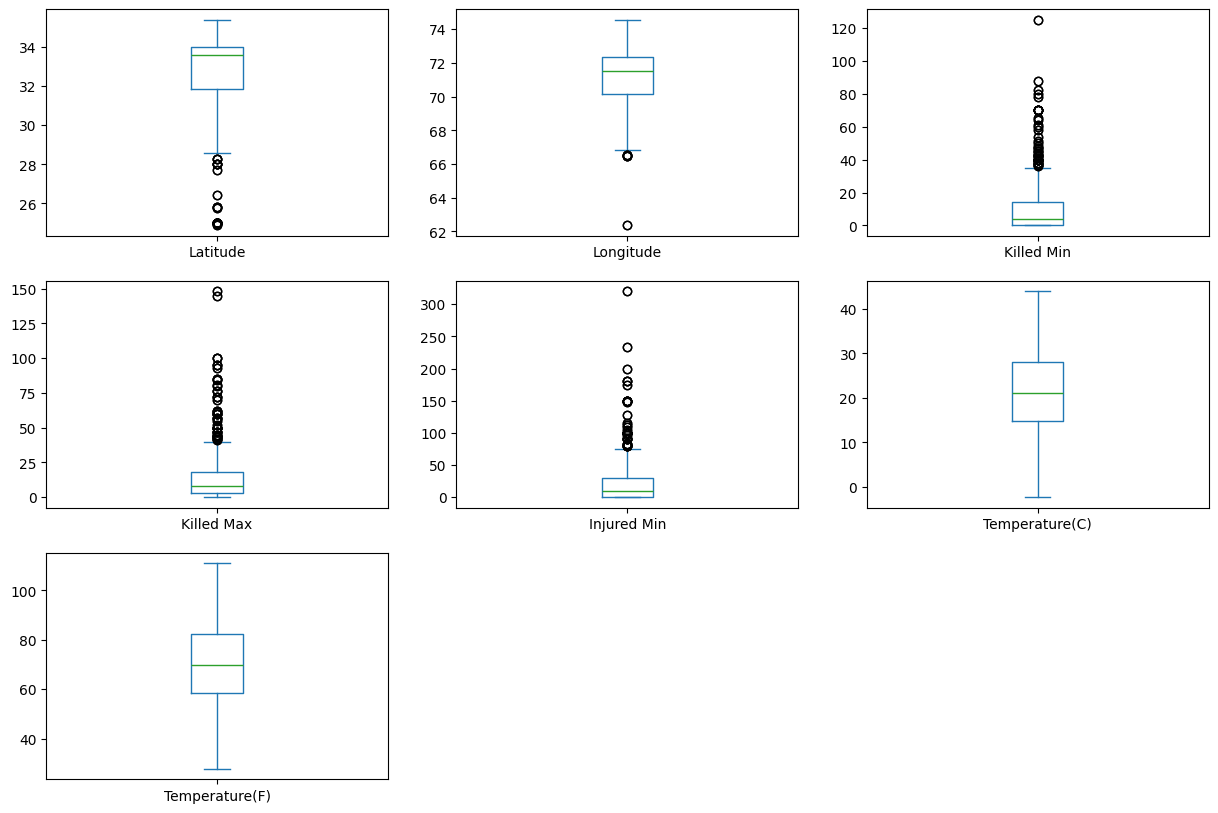

In [7]:

# Box plots for numerical columns
df[['Latitude', 'Longitude', 'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max', 'Temperature(C)', 'Temperature(F)']].plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10))

plt.show()


## Histogram

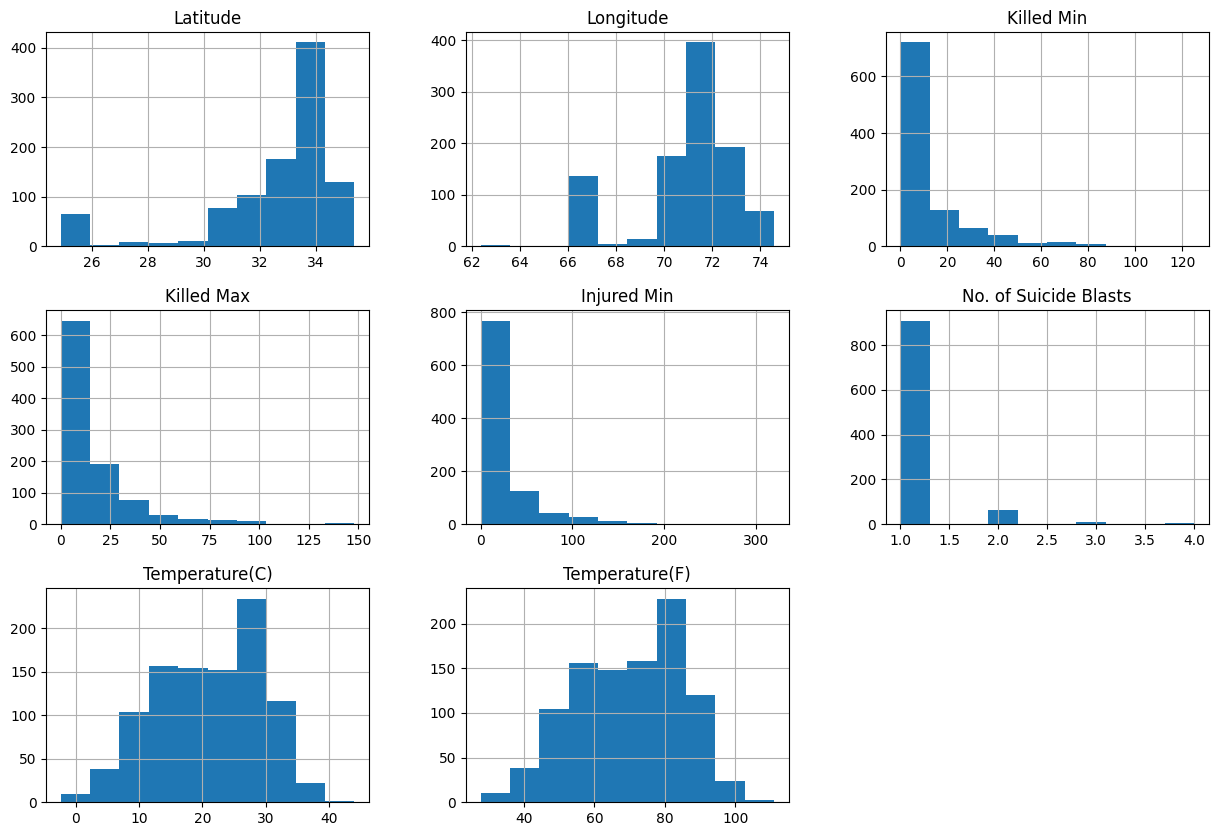

In [8]:
df.hist(figsize=(15,10))
plt.show()


## Bar Plot

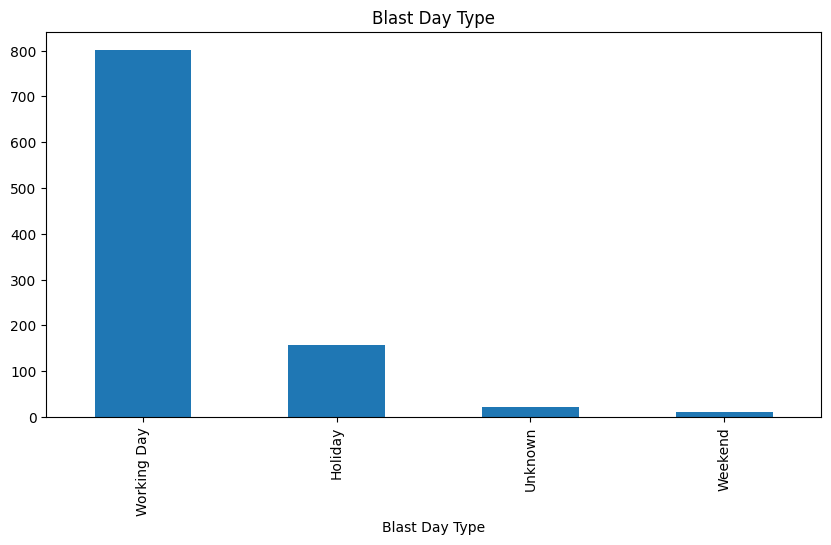

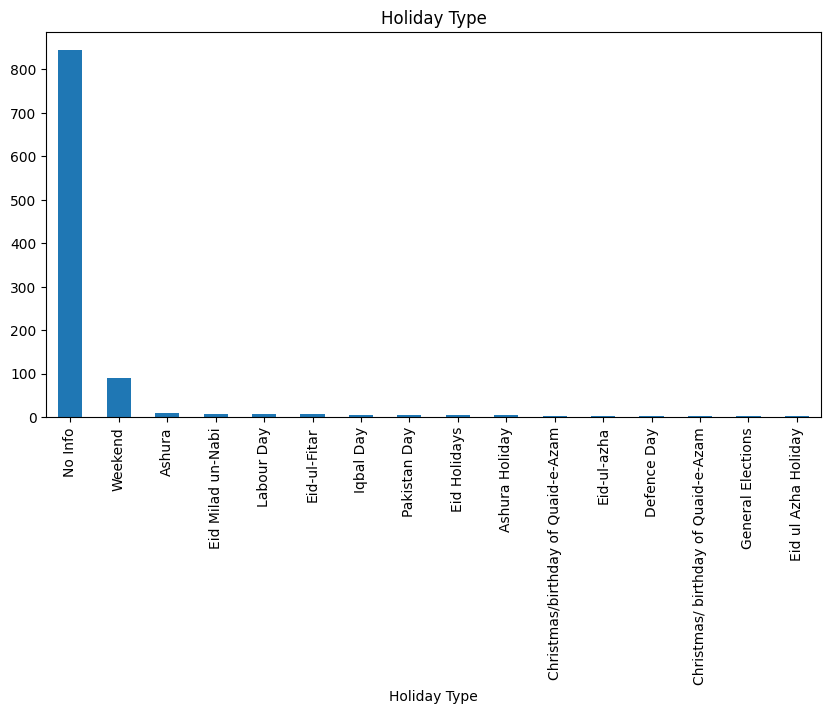

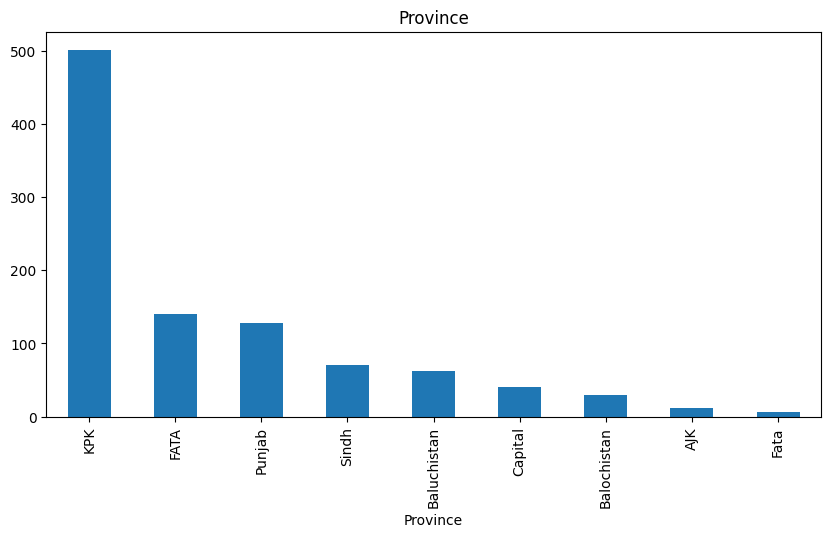

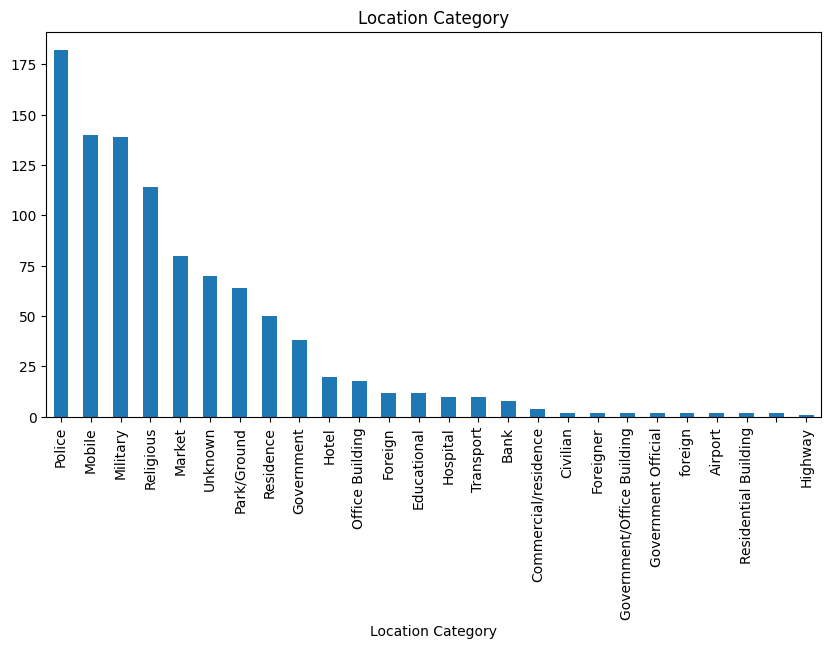

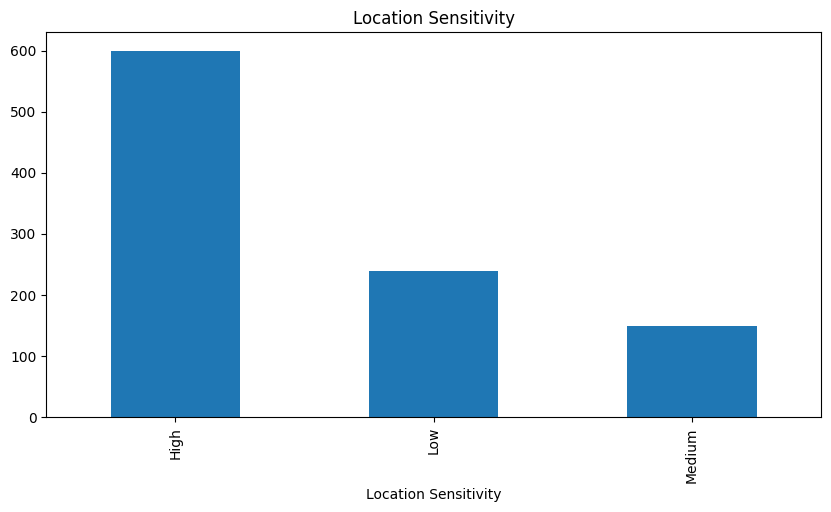

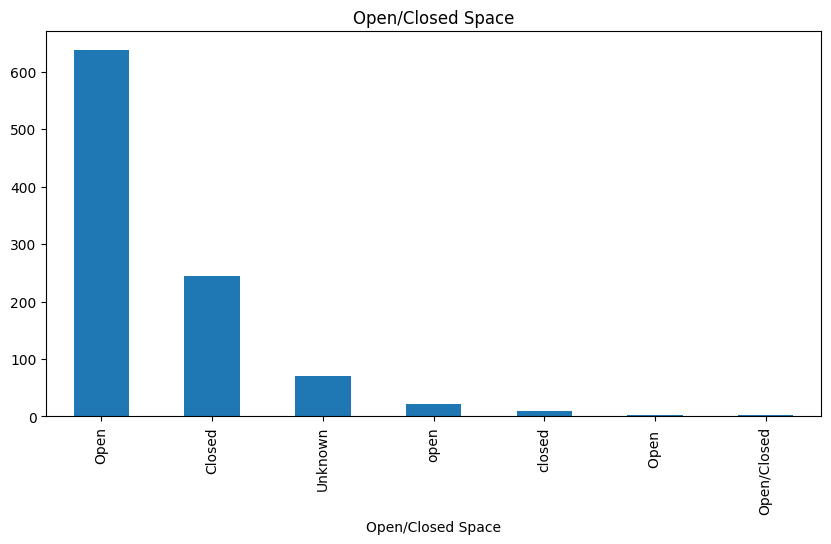

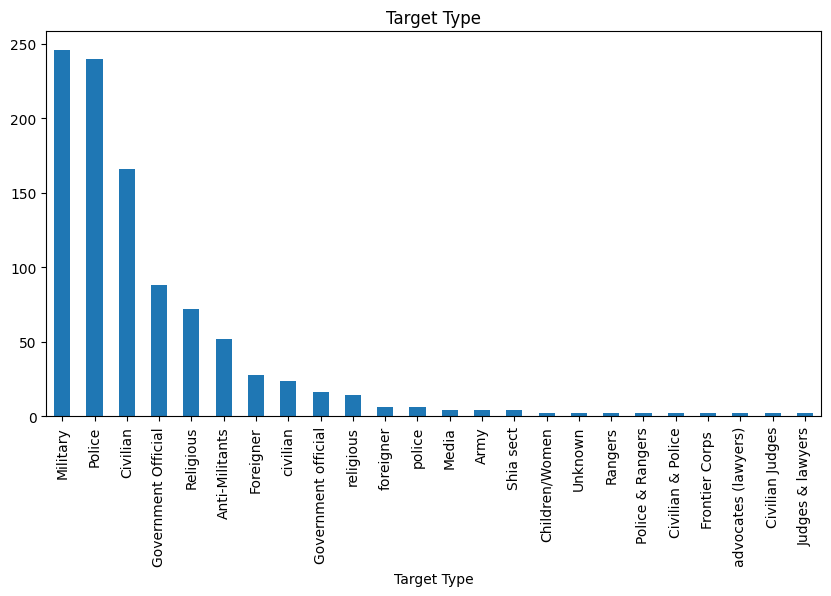

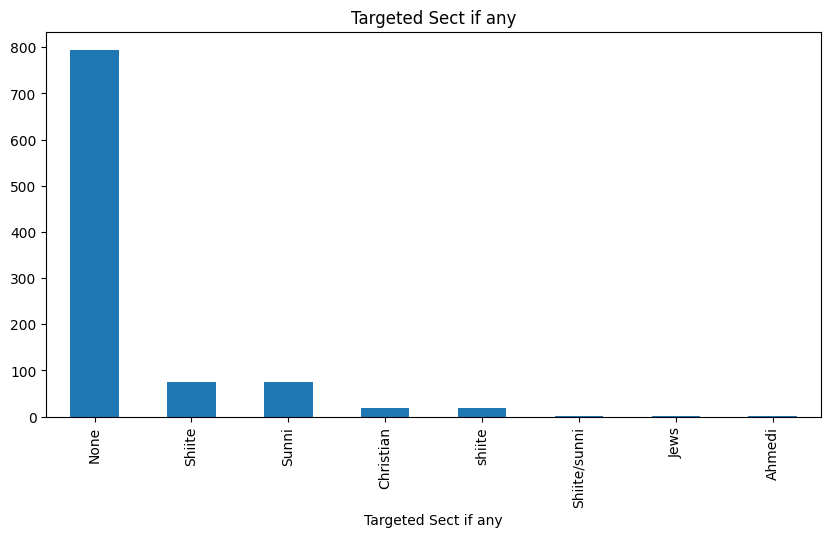

In [9]:
df['Blast Day Type'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Blast Day Type')
plt.show()

df['Holiday Type'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Holiday Type')
plt.show()

df['Province'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Province')
plt.show()

df['Location Category'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Location Category')
plt.show()

df['Location Sensitivity'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Location Sensitivity')
plt.show()

df['Open/Closed Space'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Open/Closed Space')
plt.show()

df['Target Type'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Target Type')
plt.show()

df['Targeted Sect if any'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Targeted Sect if any')
plt.show()

## Scatter Plot

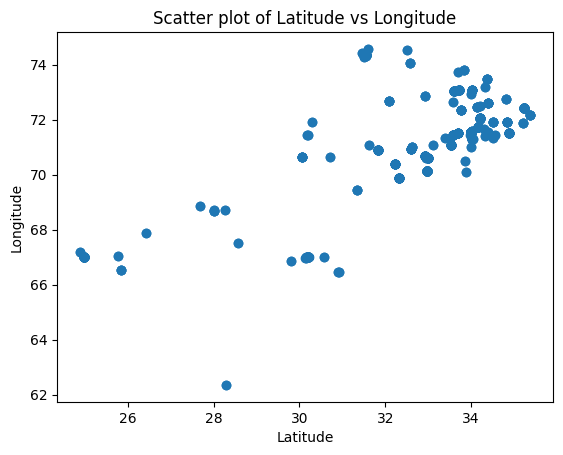

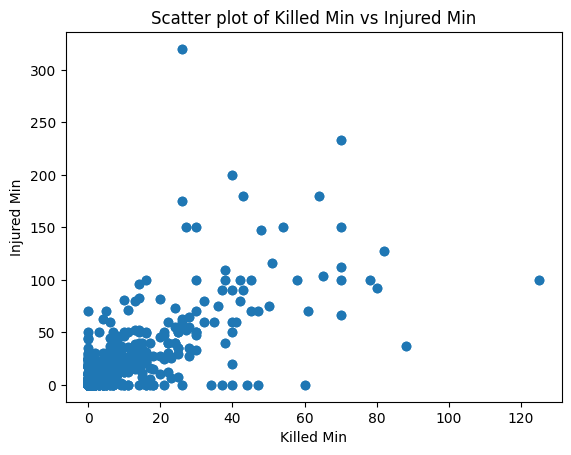

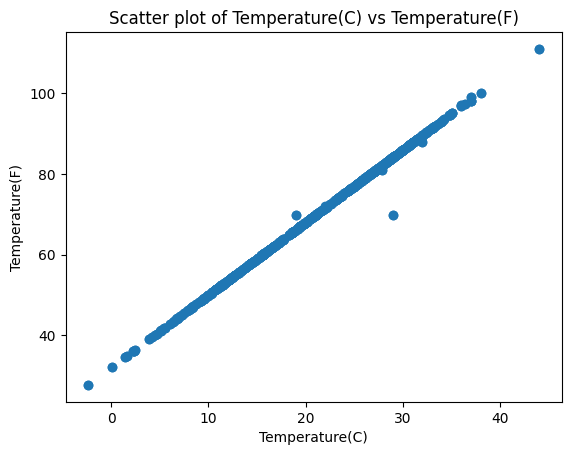

In [10]:
plt.scatter(df['Latitude'], df['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter plot of Latitude vs Longitude')
plt.show()


plt.scatter(df['Killed Min'], df['Injured Min'])
plt.xlabel('Killed Min')
plt.ylabel('Injured Min')
plt.title('Scatter plot of Killed Min vs Injured Min')
plt.show()



plt.scatter(df['Temperature(C)'], df['Temperature(F)'])
plt.xlabel('Temperature(C)')
plt.ylabel('Temperature(F)')
plt.title('Scatter plot of Temperature(C) vs Temperature(F)')
plt.show()



# Correlation Analysis

In [11]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

numeric_df = df.select_dtypes(exclude=['object'])


Non-numeric columns: Index(['Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Province', 'Location', 'Location Category',
       'Location Sensitivity', 'Open/Closed Space', 'Influencing Event/Event',
       'Target Type', 'Targeted Sect if any', 'Injured Max',
       'Explosive Weight (max)', 'Hospital Names'],
      dtype='object')


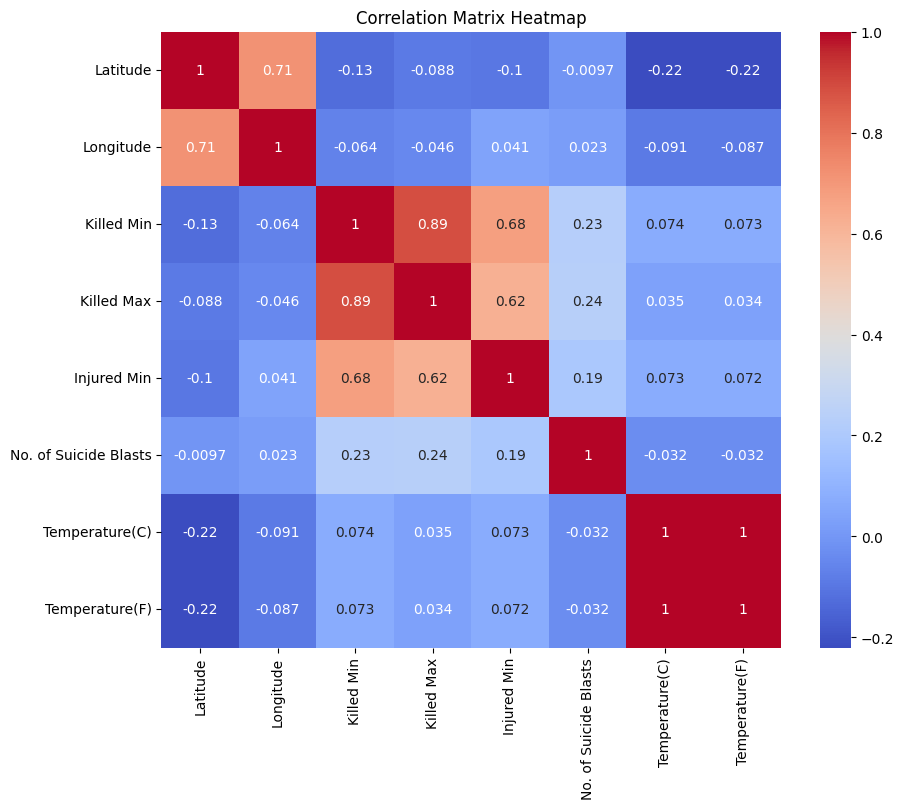

In [12]:

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# Trend Analysis

In [13]:
# Convert 'Date' to datetime format with the correct format specified
df['Date'] = pd.to_datetime(df['Date'], format='%A-%b %d-%Y', errors='coerce')

# Verify the conversion
print(df['Date'].head())


0          NaT
1          NaT
2   2002-05-08
3          NaT
4          NaT
Name: Date, dtype: datetime64[ns]


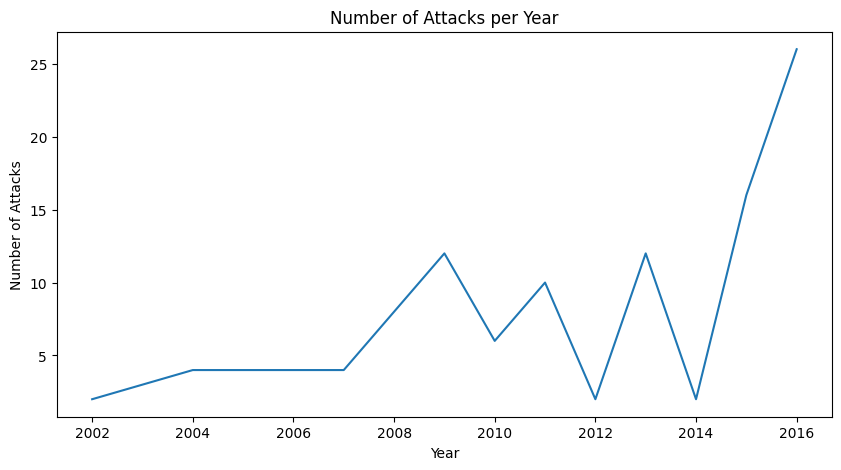

In [14]:
# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Plot the number of attacks per year
df.groupby('Year').size().plot(kind='line', figsize=(10, 5))
plt.title('Number of Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


# Group Analysis

In [15]:
# Group by 'City' and analyze the total number of killed and injured
city_group = df.groupby('City').agg({'Killed Min': 'sum', 'Injured Min': 'sum'}).sort_values(by='Killed Min', ascending=False)

# Display the grouped data
print(city_group)


                Killed Min  Injured Min
City                                   
Quetta              1307.0       2816.0
Peshawar            1049.0       2680.0
Lahore               544.0       1402.0
Rawalpindi           536.0        830.0
Lahore               406.0       1934.0
...                    ...          ...
Khyber Agency          0.0          0.0
Lakki Marwat           0.0          0.0
Poonch                 0.0          2.0
Mansehra               0.0          8.0
swat                   0.0          0.0

[93 rows x 2 columns]


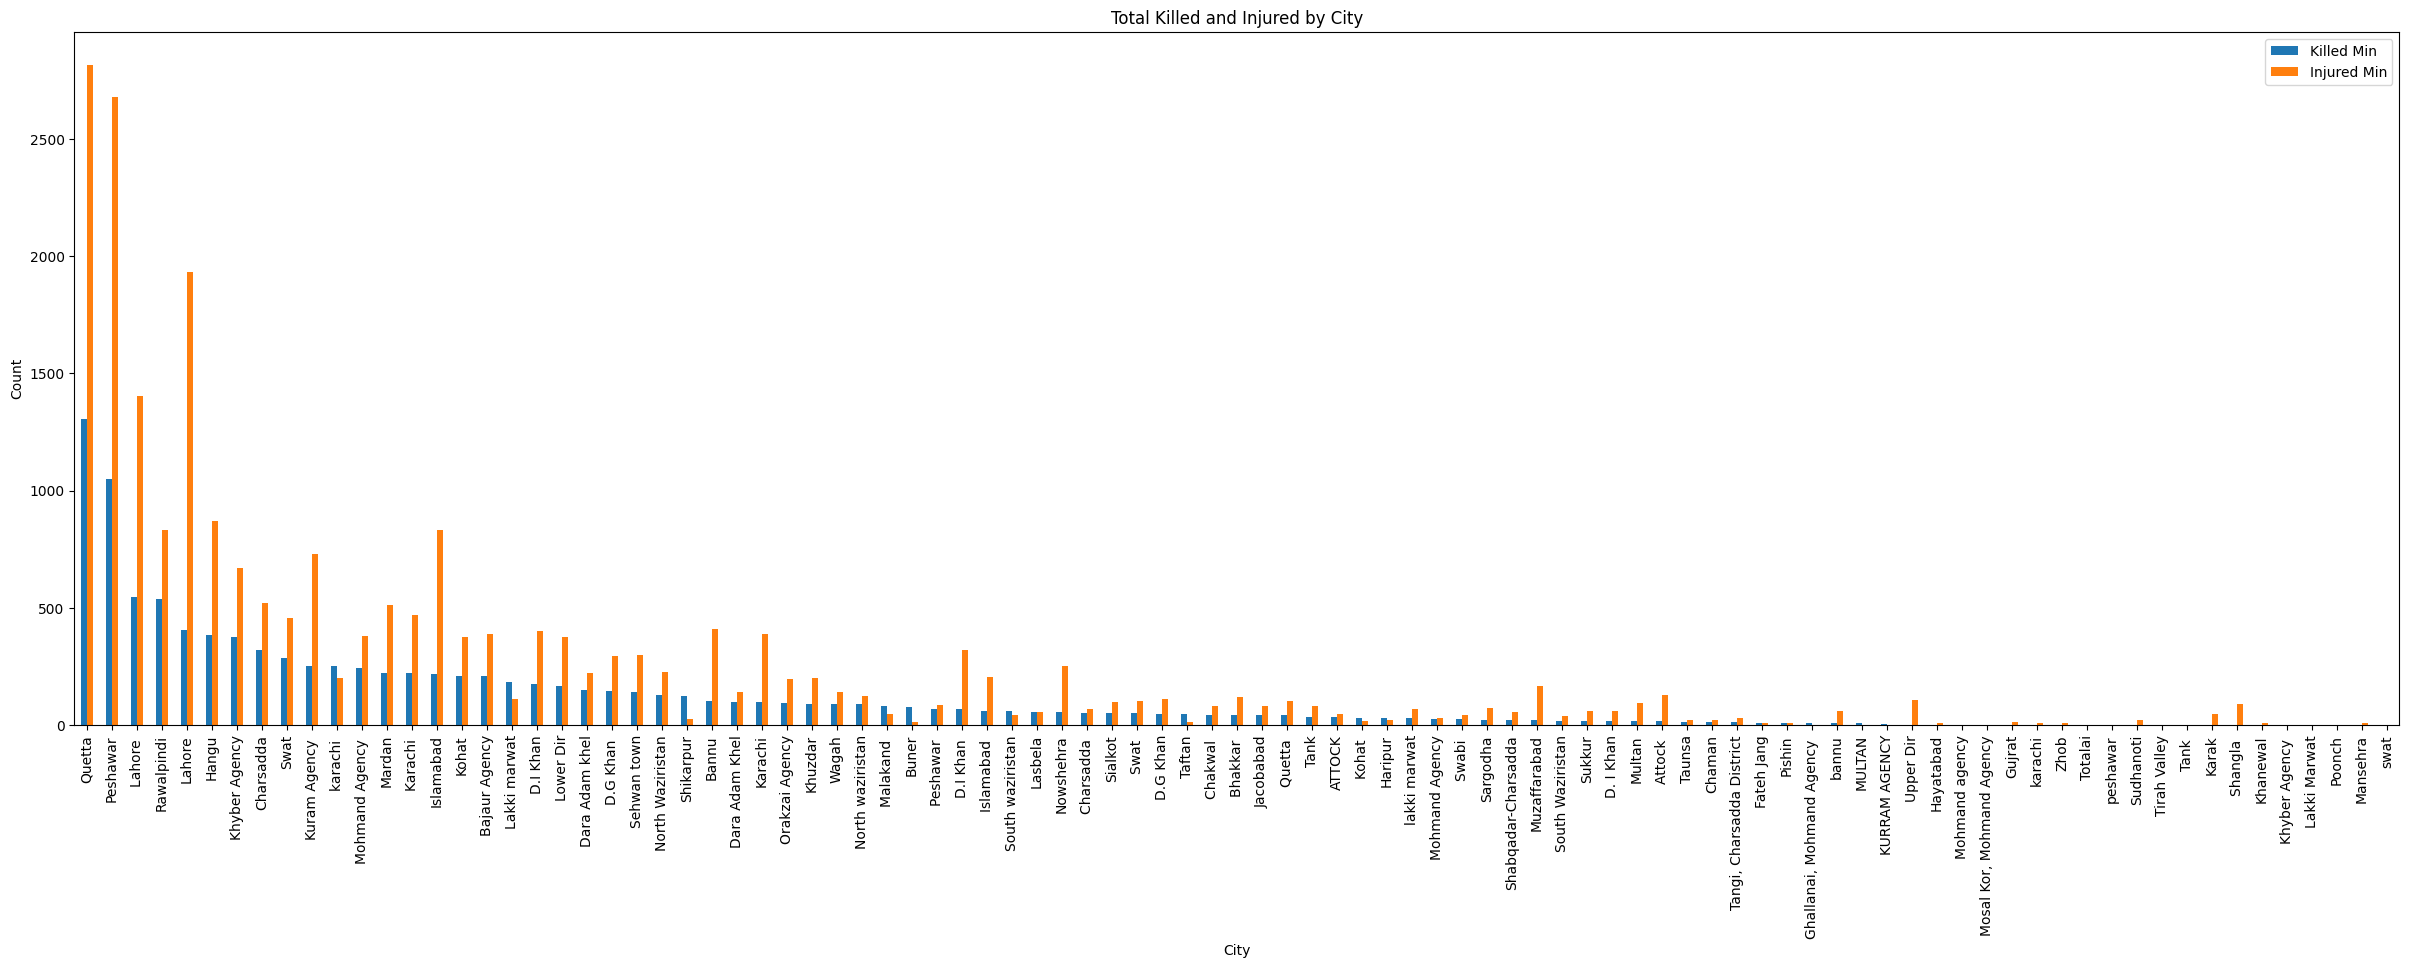

In [16]:
# Visualize the total number of killed and injured by city
city_group.plot(kind='bar', figsize=(30, 9))
plt.title('Total Killed and Injured by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()


# Time Series Analysis
### a.Monthly/Yearly Trends

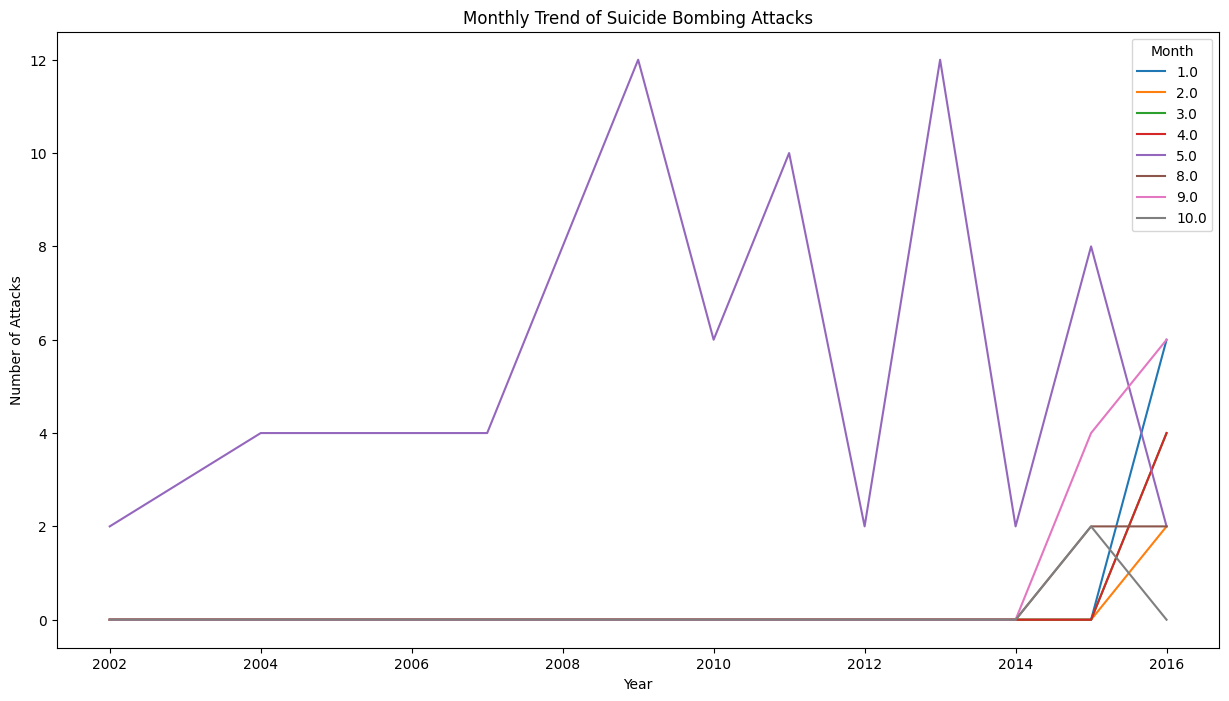

In [17]:
# Extract year and month from the Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by Year and Month to see the trend
monthly_trend = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Plot the monthly trend
monthly_trend.plot(figsize=(15, 8))
plt.title('Monthly Trend of Suicide Bombing Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


### b. Yearly Trends

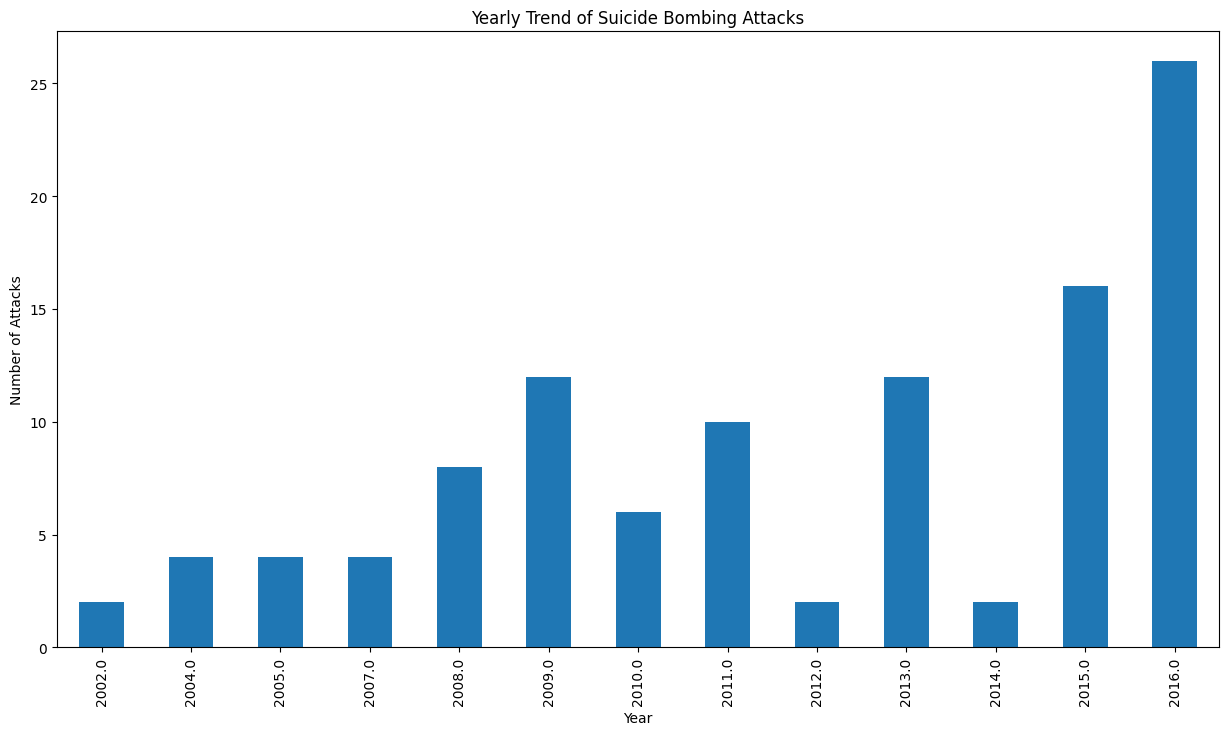

In [18]:
# Group by Year to see the trend
yearly_trend = df.groupby('Year').size()

# Plot the yearly trend
yearly_trend.plot(kind='bar', figsize=(15, 8))
plt.title('Yearly Trend of Suicide Bombing Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


# Geospatial Analysis

In [19]:
import folium
from folium.plugins import HeatMap

# Create a map centered around Pakistan
m = folium.Map(location=[30.3753, 69.3451], zoom_start=5)

# Add points to the map
for idx, row in df.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=5,
                        color='red',
                        fill=True,
                        fill_color='red').add_to(m)

# Save the map to an HTML file
m.save('suicide_bombing_attacks_map.html')


# Pattern and Frequencies

### a. Distribution of Attacks by Day of the Week

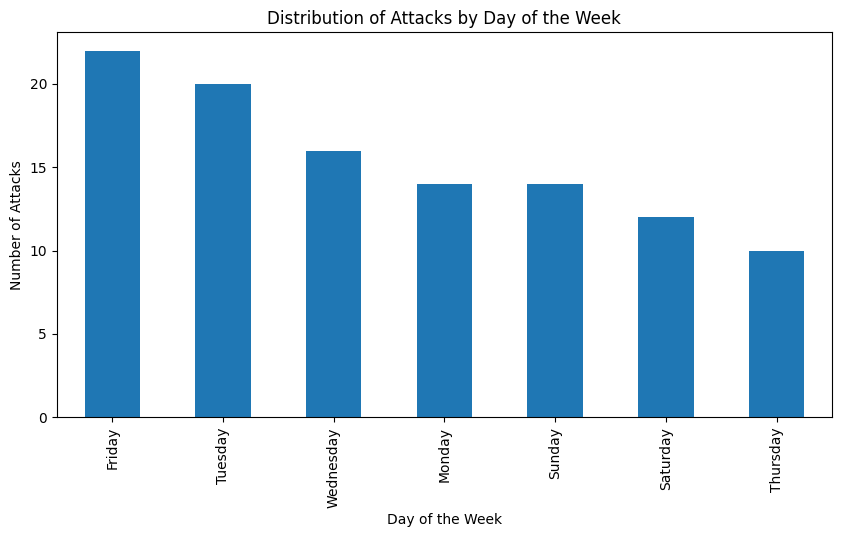

In [20]:
# Extract the day of the week
df['DayOfWeek'] = df['Date'].dt.day_name()

# Plot the distribution
df['DayOfWeek'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Distribution of Attacks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Attacks')
plt.show()


### b. Distribution of Attack by Month

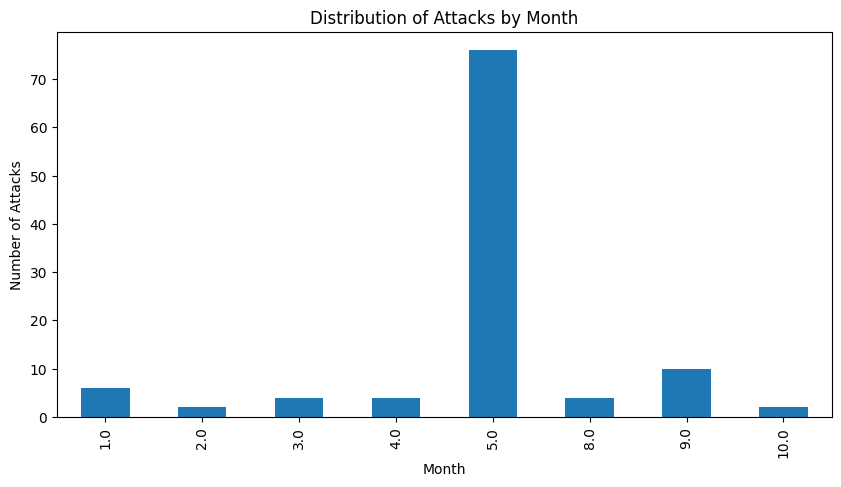

In [21]:
#Plot the distribution by Month
df['Month'].value_counts().sort_index().plot(kind='bar' , figsize=(10,5))
plt.title('Distribution of Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.show()

# Impact Analysis

### a. Casualties Analysis

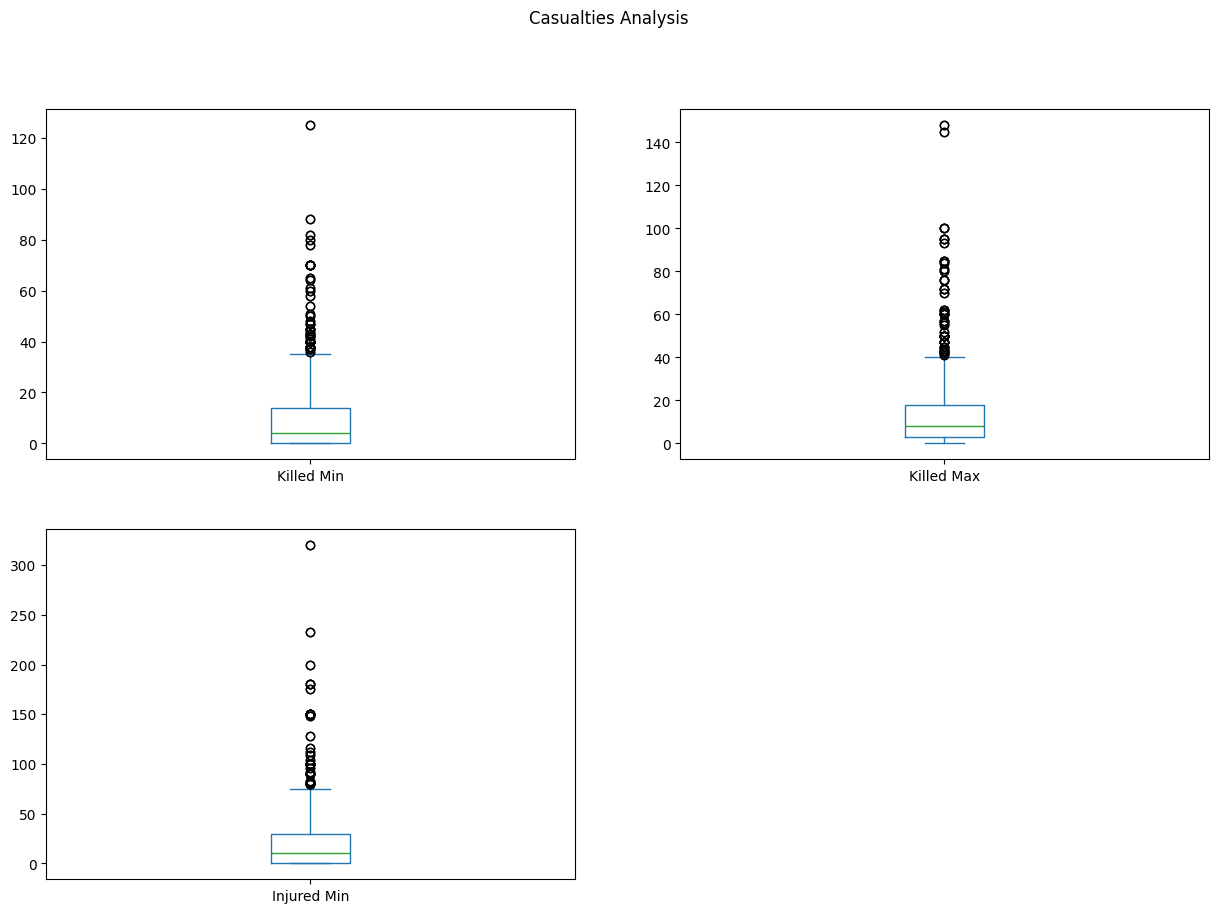

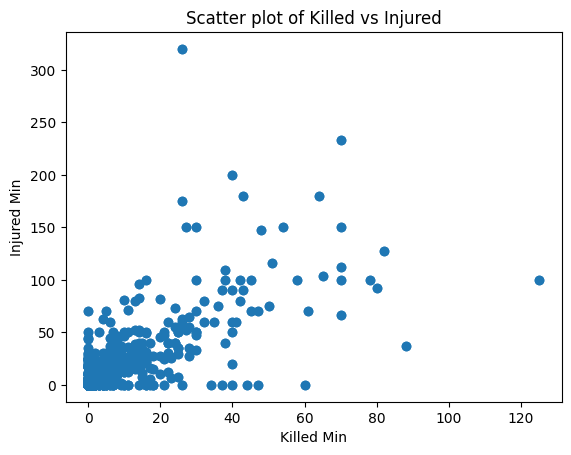

In [22]:
# Box plot for casualties
df[['Killed Min', 'Killed Max', 'Injured Min', 'Injured Max']].plot(kind='box', subplots=True, layout=(2, 2), figsize=(15, 10))
plt.suptitle('Casualties Analysis')
plt.show()

# Scatter plot for Killed vs Injured
plt.scatter(df['Killed Min'], df['Injured Min'])
plt.xlabel('Killed Min')
plt.ylabel('Injured Min')
plt.title('Scatter plot of Killed vs Injured')
plt.show()


# Socio-Political and Demographic Analysis
### a. Analysis by Location Sensitivity

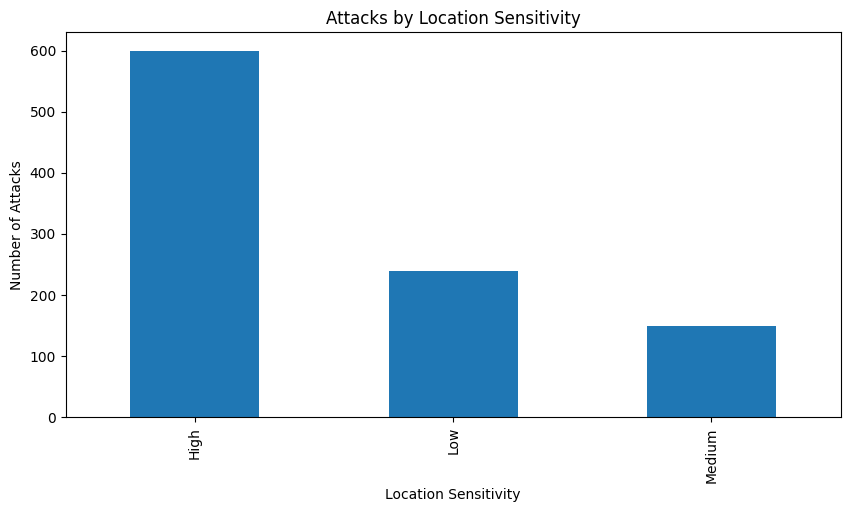

In [23]:
# Bar plot for Location Sensitivity
df['Location Sensitivity'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Attacks by Location Sensitivity')
plt.xlabel('Location Sensitivity')
plt.ylabel('Number of Attacks')
plt.show()


### b. Analysis by Target Type

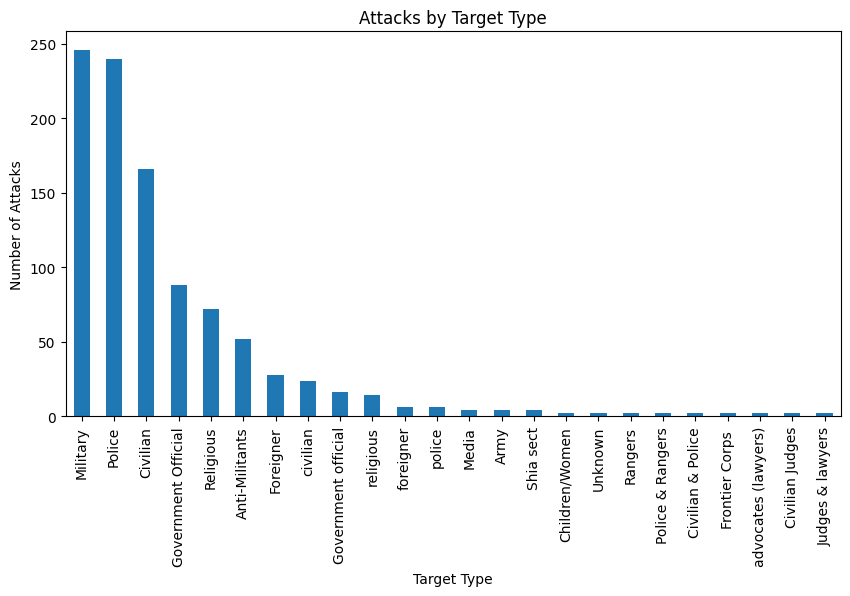

In [24]:
# Bar plot for Target Type
df['Target Type'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Attacks by Target Type')
plt.xlabel('Target Type')
plt.ylabel('Number of Attacks')
plt.show()


# Visualization

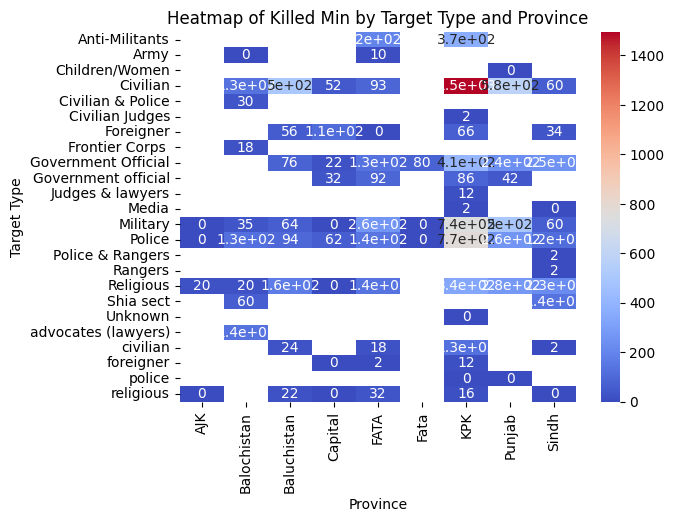

In [25]:
# Heatmap for two categorical variables
heatmap_data = df.pivot_table(index='Target Type', columns='Province', values='Killed Min', aggfunc='sum')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Killed Min by Target Type and Province')
plt.show()


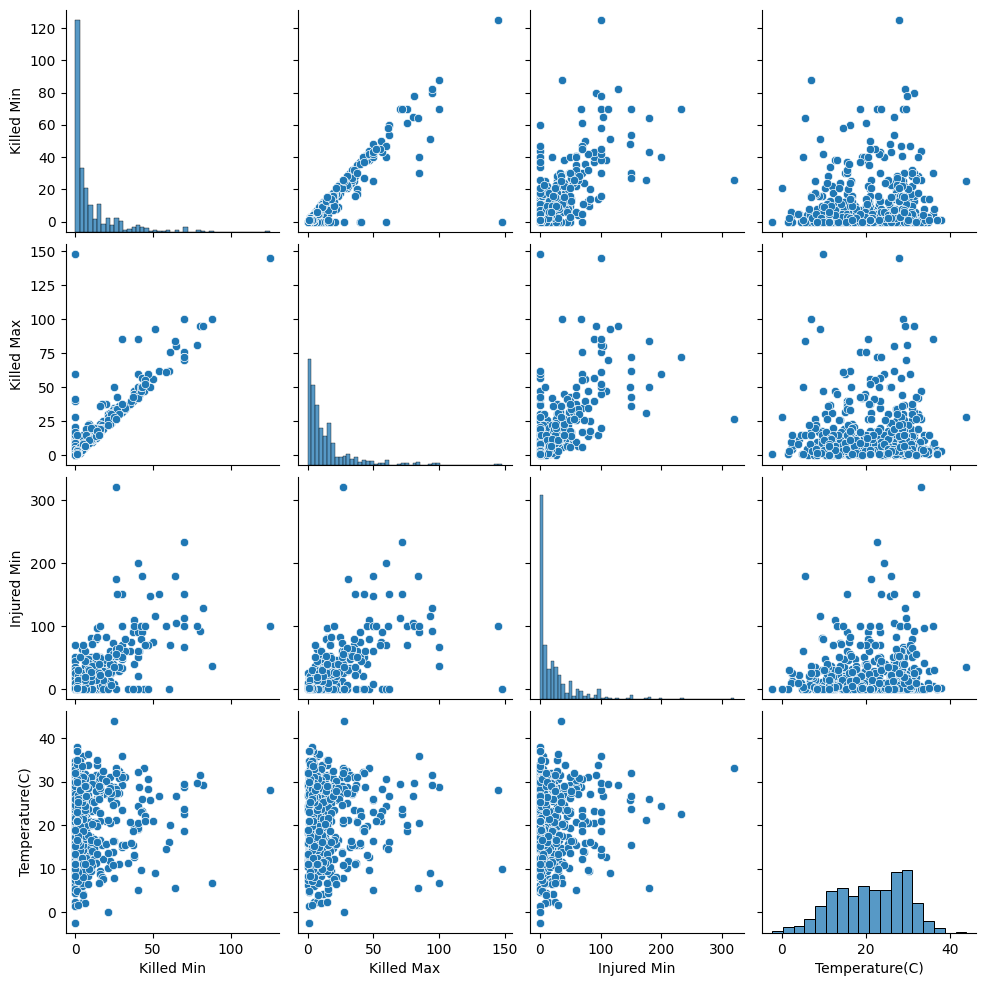

In [26]:
# Pair plot for selected numeric columns
sns.pairplot(df[['Killed Min', 'Killed Max', 'Injured Min', 'Injured Max', 'Temperature(C)']])
plt.show()


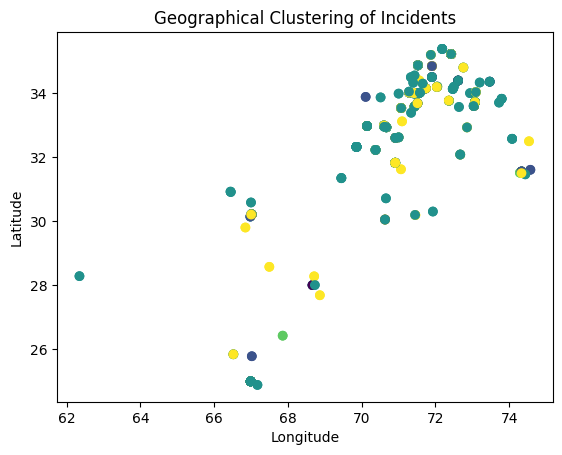

In [27]:
from sklearn.cluster import KMeans

# Selecting features for clustering
features = df[['Latitude', 'Longitude', 'Killed Min', 'Injured Min']]
# Handle any missing values
features = features.dropna()

# Applying KMeans clustering
kmeans = KMeans(n_clusters=5)
df['Cluster'] = kmeans.fit_predict(features)

# Visualizing clusters
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis')
plt.title('Geographical Clustering of Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


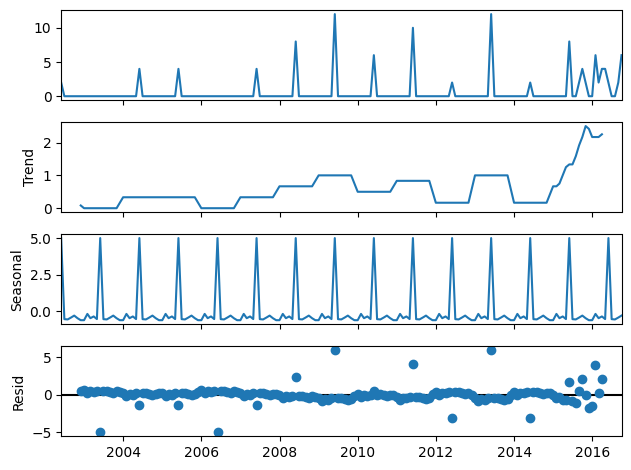

In [47]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

monthly_data = df.resample('ME', on='Date').size()

# Decomposing time series
decomposition = sm.tsa.seasonal_decompose(monthly_data, model='additive')
fig = decomposition.plot()
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare data for regression
X = df[['Latitude', 'Longitude', 'Temperature(C)']].dropna()
y = df['Killed Min'].dropna()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Evaluate the model
print(f"Model R^2 Score: {regressor.score(X_test, y_test)}")


Model R^2 Score: -0.02789865808480596


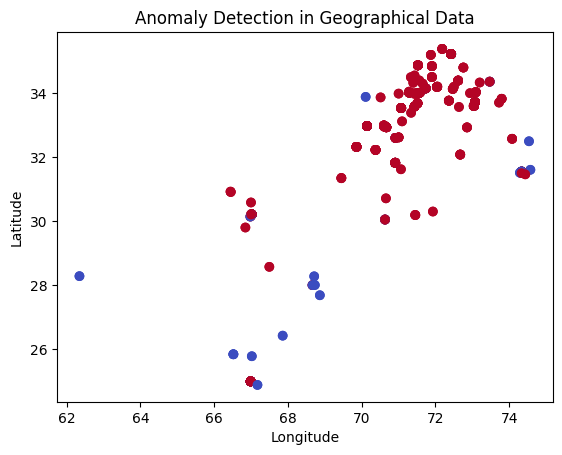

In [30]:
from sklearn.ensemble import IsolationForest

# Prepare data for anomaly detection
anomaly_features = df[['Latitude', 'Longitude', 'Killed Min', 'Injured Min']].dropna()

# Train the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1)
df['Anomaly'] = iso_forest.fit_predict(anomaly_features)

# Visualize anomalies
plt.scatter(df['Longitude'], df['Latitude'], c=df['Anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection in Geographical Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data for classification
X = df[['Latitude', 'Longitude', 'Temperature(C)']].dropna()
y = df['Target Type'].dropna()

# Encode categorical target variable
y_encoded = pd.factorize(y)[0]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Evaluate the model
print(f"Model Accuracy: {classifier.score(X_test, y_test)}")


Model Accuracy: 0.8080808080808081


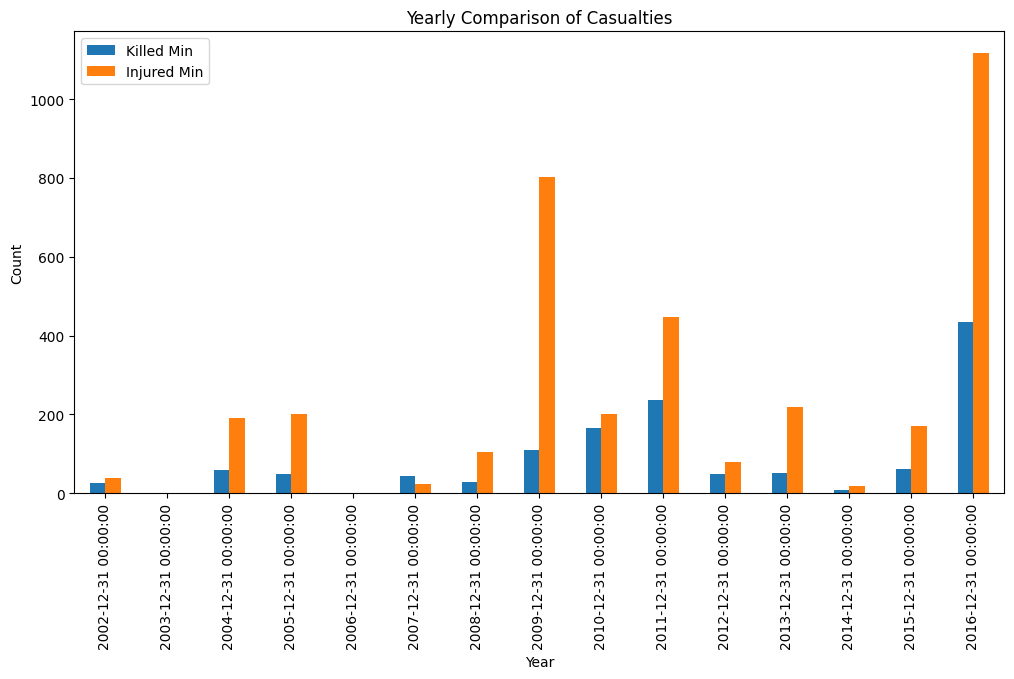

In [48]:
# Group by year and sum casualties
yearly_data = df.resample('YE', on='Date').agg({'Killed Min': 'sum', 'Injured Min': 'sum'})

# Plot yearly comparison
yearly_data.plot(kind='bar', figsize=(12, 6))
plt.title('Yearly Comparison of Casualties')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


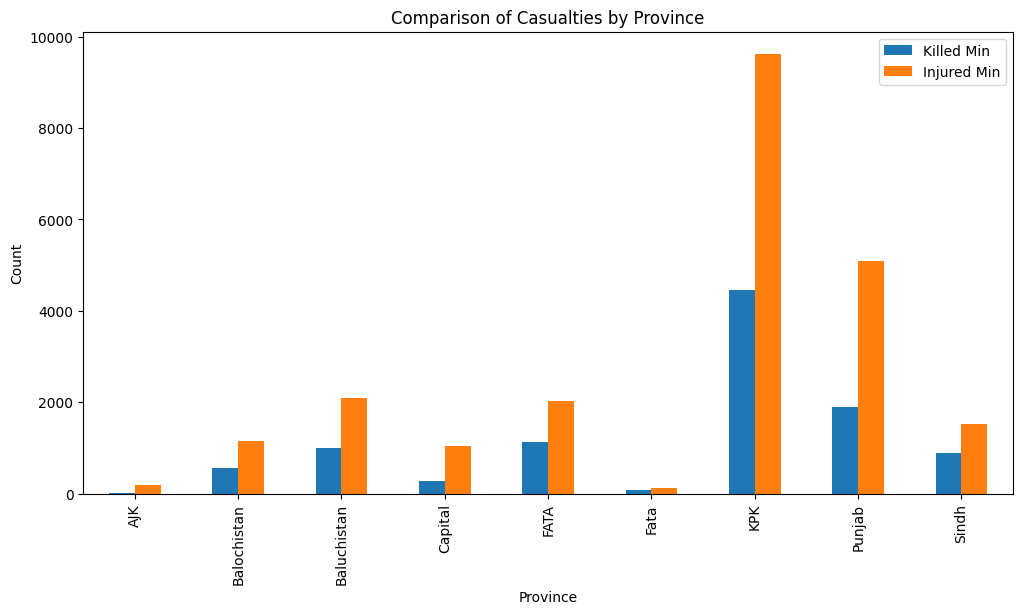

In [33]:
# Group by province and sum casualties
province_data = df.groupby('Province').agg({'Killed Min': 'sum', 'Injured Min': 'sum'})

# Plot comparison by province
province_data.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Casualties by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.show()


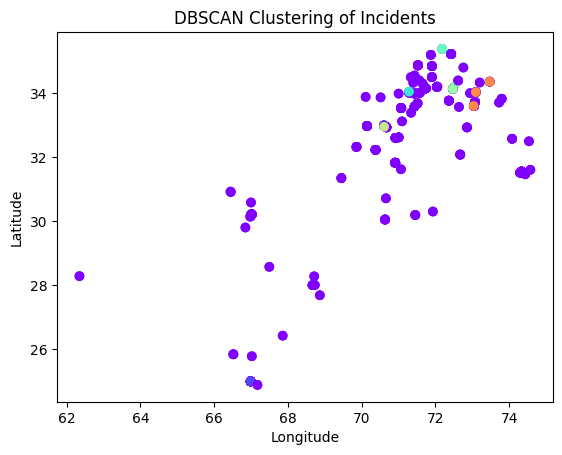

In [34]:
from sklearn.cluster import DBSCAN

# Prepare features
clustering_features = df[['Latitude', 'Longitude', 'Killed Min', 'Injured Min']].dropna()

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(clustering_features)

# Visualize DBSCAN clusters
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster_DBSCAN'], cmap='rainbow')
plt.title('DBSCAN Clustering of Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


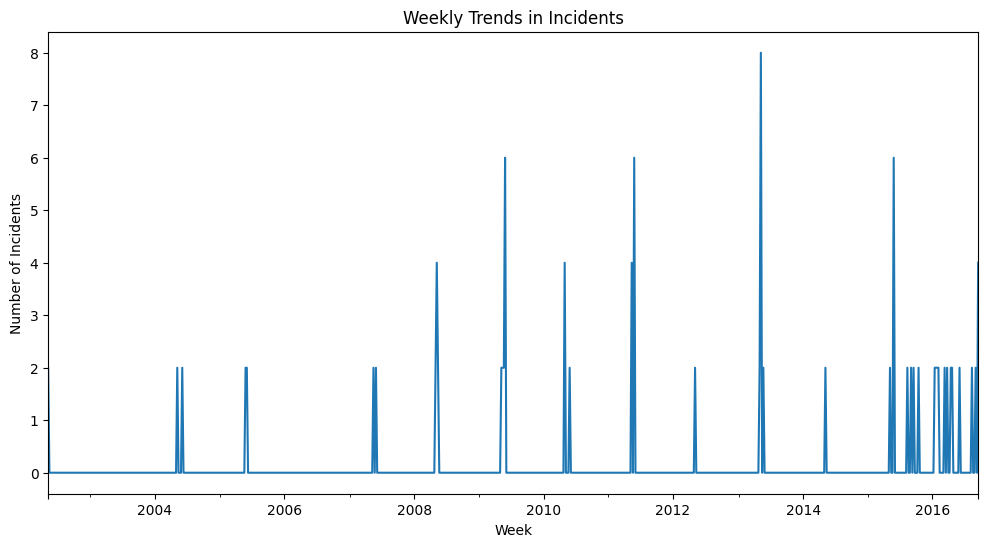

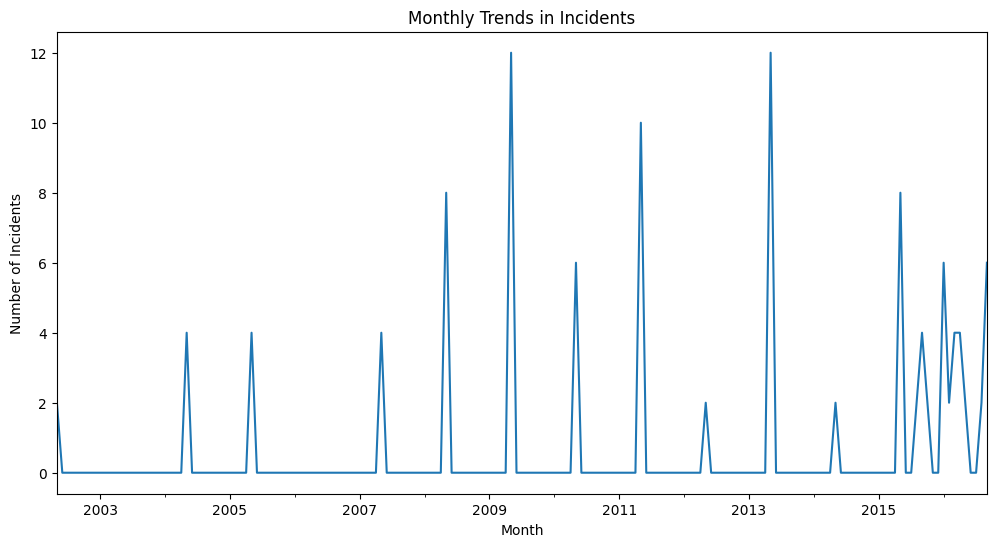

In [49]:
# Group by week and count incidents
weekly_data = df.resample('W', on='Date').size()

# Plot weekly trends
weekly_data.plot(kind='line', figsize=(12, 6))
plt.title('Weekly Trends in Incidents')
plt.xlabel('Week')
plt.ylabel('Number of Incidents')
plt.show()

# Group by month and count incidents
monthly_data = df.resample('ME', on='Date').size()

# Plot monthly trends
monthly_data.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Trends in Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.show()


In [36]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Initialize Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    dcc.Graph(id='scatter-plot'),
    dcc.Dropdown(
        id='dropdown',
        options=[{'label': i, 'value': i} for i in df['Province'].unique()],
        value=df['Province'].unique()[0]
    )
])

# Define callback to update graph
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('dropdown', 'value')]
)
def update_graph(selected_province):
    filtered_df = df[df['Province'] == selected_province]
    fig = px.scatter(filtered_df, x='Longitude', y='Latitude', color='Killed Min',
                     title=f'Suicide Bombing Incidents in {selected_province}')
    return fig

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)


## Univariate Analysis

In [37]:
# Summary statistics for all columns
print(df.describe(include='all'))


                       Date Islamic Date Blast Day Type Holiday Type     Time  \
count                   108          988            988          988      988   
unique                  NaN          312              4           16      221   
top                     NaN      Unknown    Working Day      No Info  Unknown   
freq                    NaN          310            801          844      422   
mean    2012-03-08 00:53:20          NaN            NaN          NaN      NaN   
min     2002-05-08 00:00:00          NaN            NaN          NaN      NaN   
25%     2009-05-21 00:00:00          NaN            NaN          NaN      NaN   
50%     2013-05-04 00:00:00          NaN            NaN          NaN      NaN   
75%     2015-10-14 00:00:00          NaN            NaN          NaN      NaN   
max     2016-09-16 00:00:00          NaN            NaN          NaN      NaN   
std                     NaN          NaN            NaN          NaN      NaN   

            City    Latitud

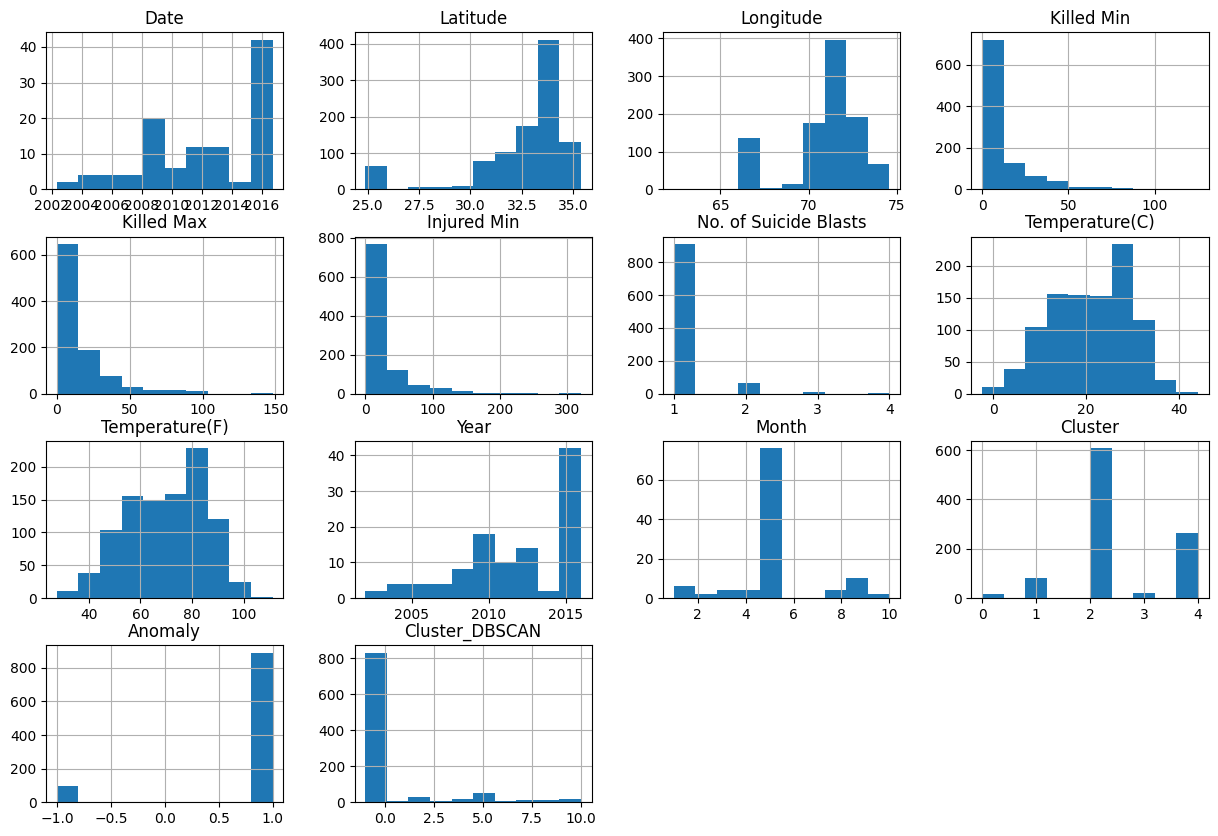

In [38]:
# Histograms for numerical columns
import matplotlib.pyplot as plt

df.hist(figsize=(15, 10))
plt.show()


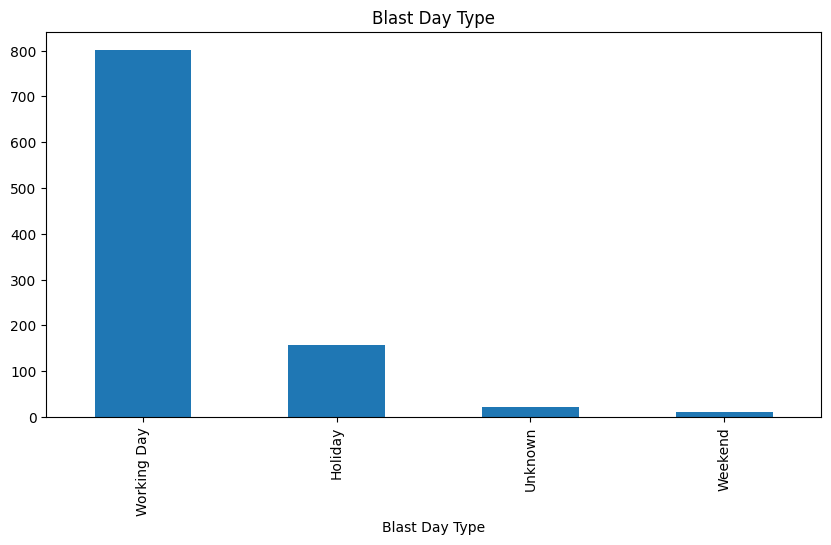

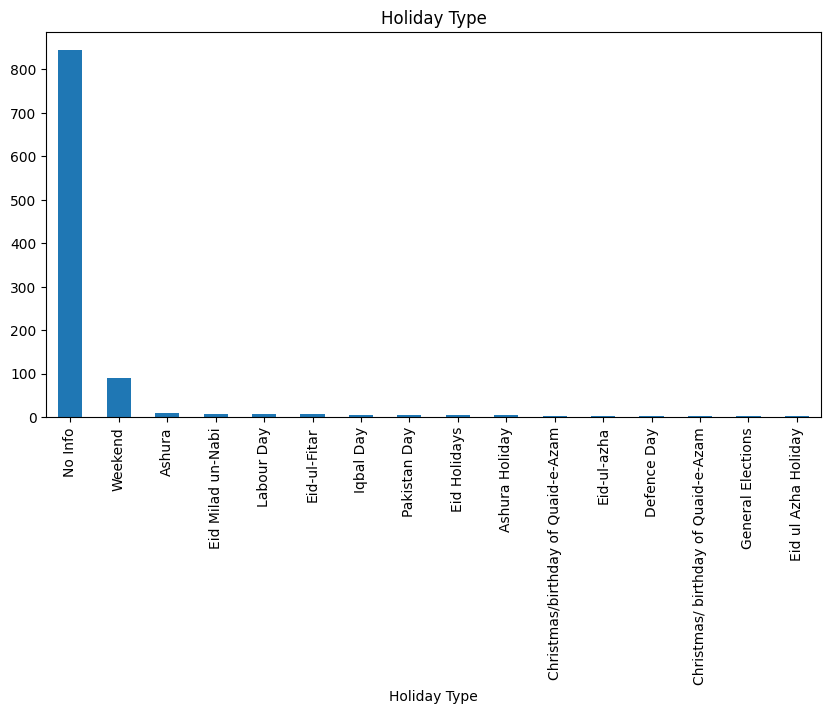

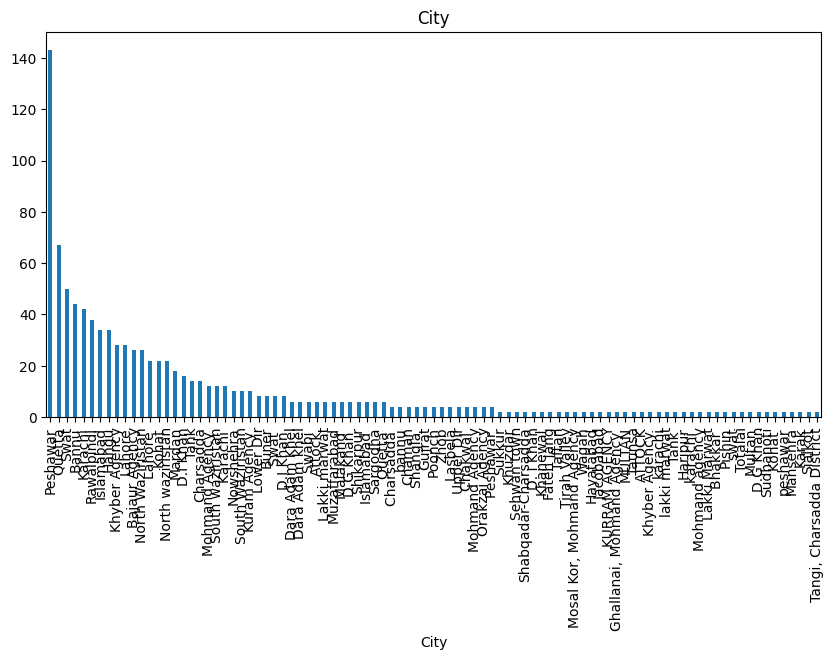

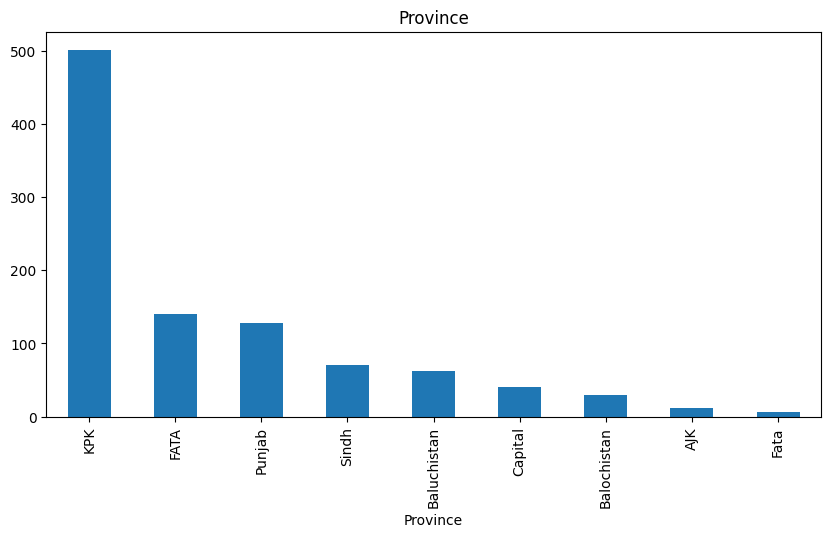

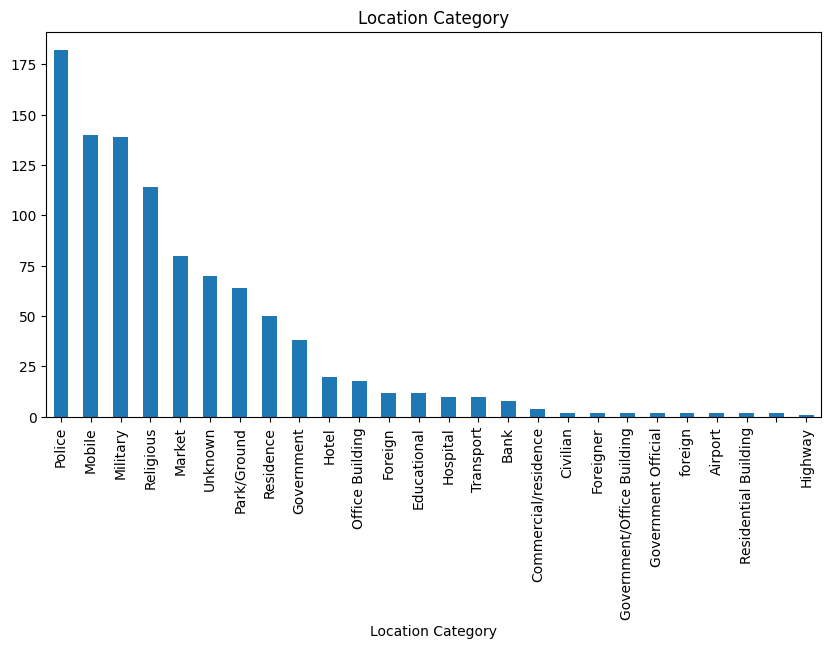

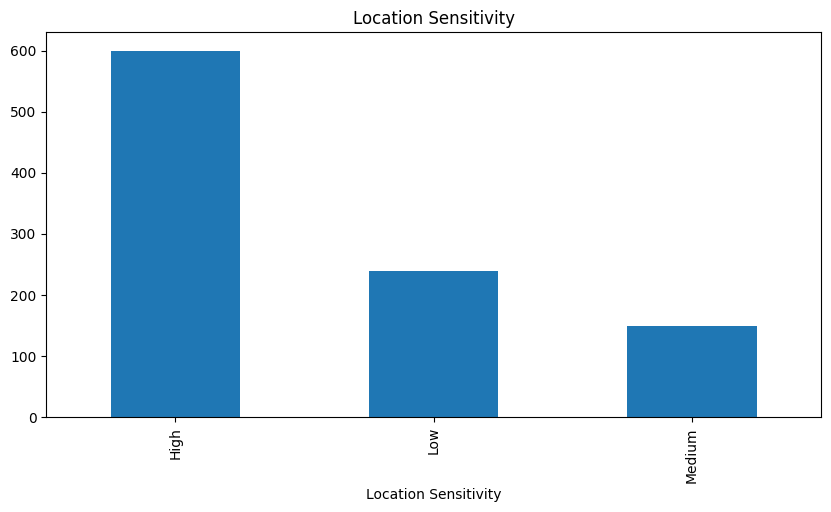

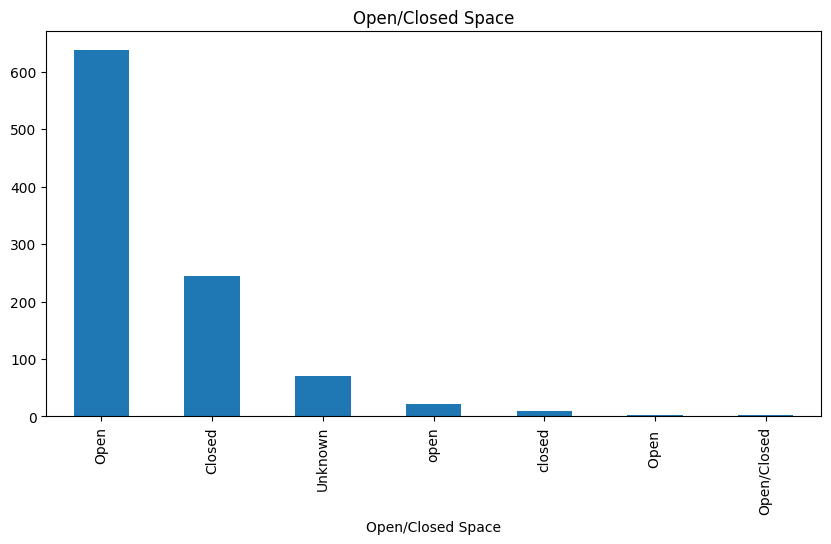

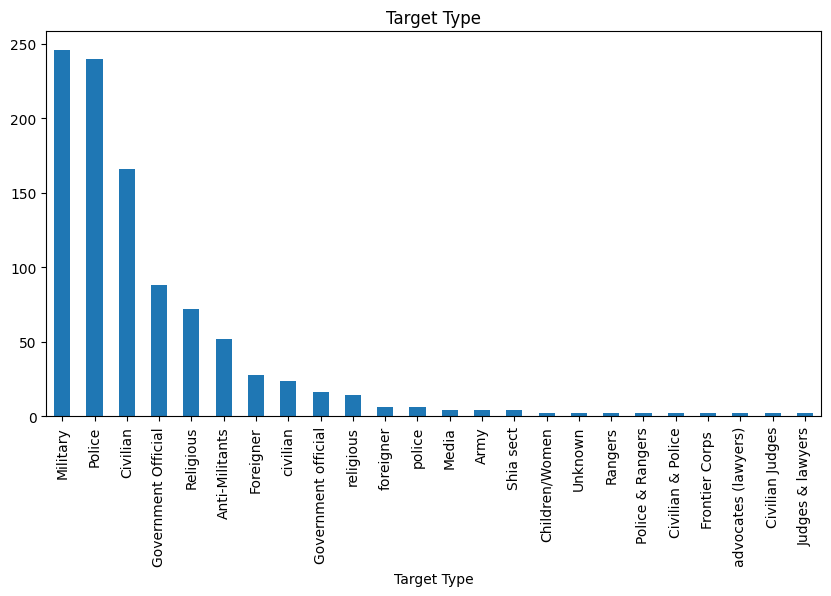

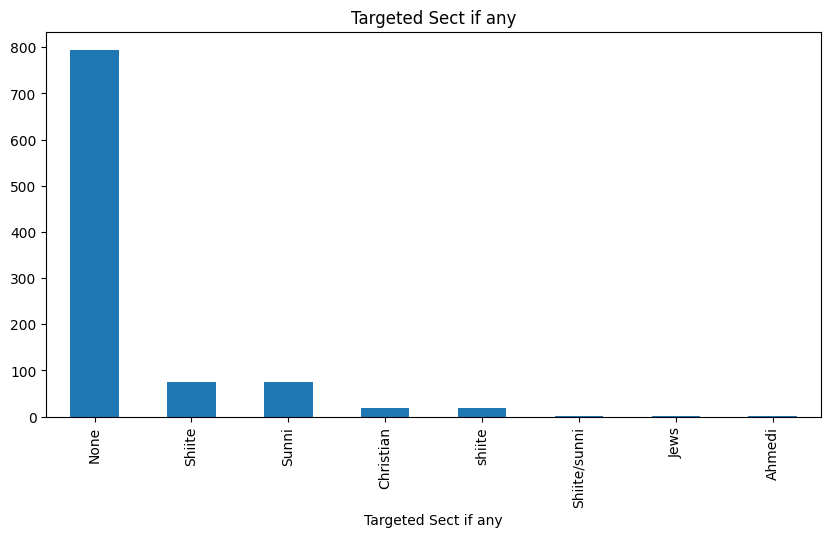

In [51]:
import matplotlib.pyplot as plt



# Bar plot for 'Blast Day Type'
df['Blast Day Type'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Blast Day Type')
plt.show()

# Bar plot for 'Holiday Type'
df['Holiday Type'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Holiday Type')
plt.show()

# Bar plot for 'City'
df['City'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('City')
plt.show()

# Bar plot for 'Province'
df['Province'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Province')
plt.show()


# Bar plot for 'Location Category'
df['Location Category'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Location Category')
plt.show()

# Bar plot for 'Location Sensitivity'
df['Location Sensitivity'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Location Sensitivity')
plt.show()

# Bar plot for 'Open/Closed Space'
df['Open/Closed Space'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Open/Closed Space')
plt.show()


# Bar plot for 'Target Type'
df['Target Type'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Target Type')
plt.show()

# Bar plot for 'Targeted Sect if any'
df['Targeted Sect if any'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Targeted Sect if any')
plt.show()




## Bivariate Analysis

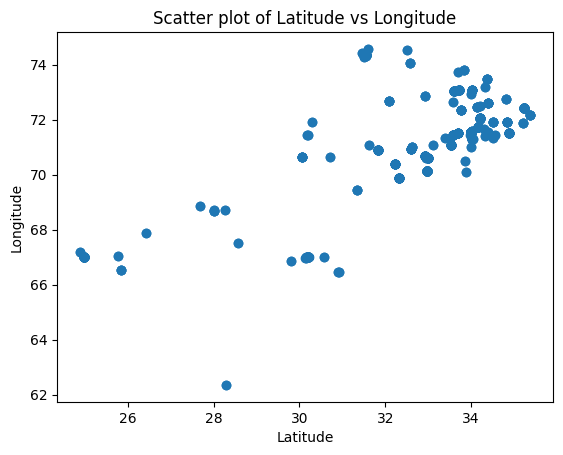

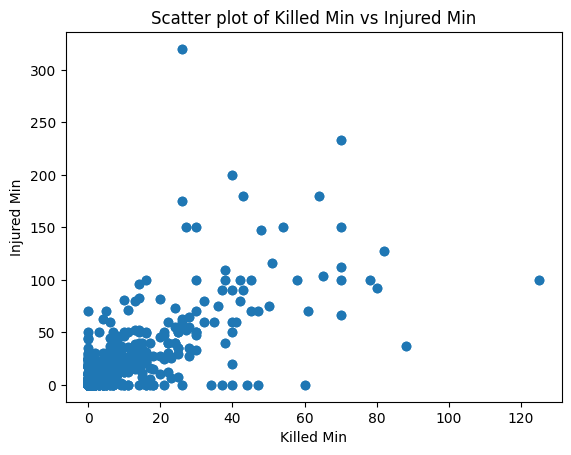

In [40]:
# Scatter plot for Latitude and Longitude
plt.scatter(df['Latitude'], df['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter plot of Latitude vs Longitude')
plt.show()

# Scatter plot for Killed Min and Injured Min
plt.scatter(df['Killed Min'], df['Injured Min'])
plt.xlabel('Killed Min')
plt.ylabel('Injured Min')
plt.title('Scatter plot of Killed Min vs Injured Min')
plt.show()


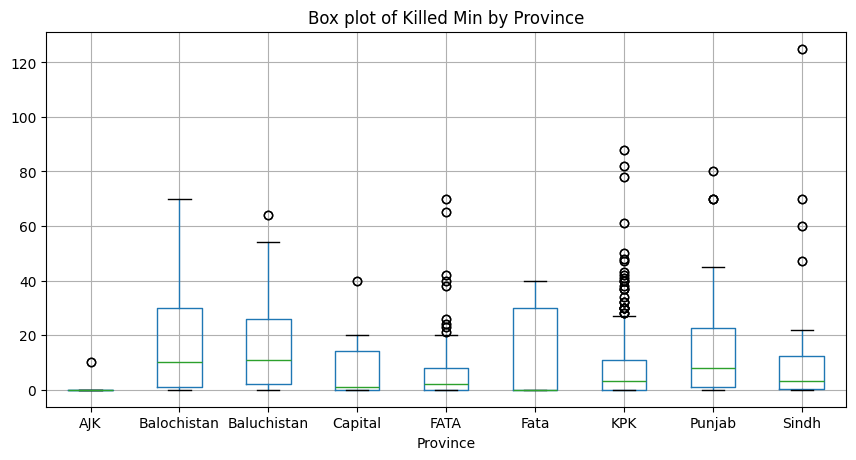

In [41]:
# Box plots for Killed Min by Province
df.boxplot(column='Killed Min', by='Province', figsize=(10, 5))
plt.title('Box plot of Killed Min by Province')
plt.suptitle('')  # Remove the default title
plt.show()


## Multivariate Analysis

In [42]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])


In [43]:
# Correlation matrix for numerical columns
corr_matrix = numeric_df.corr()


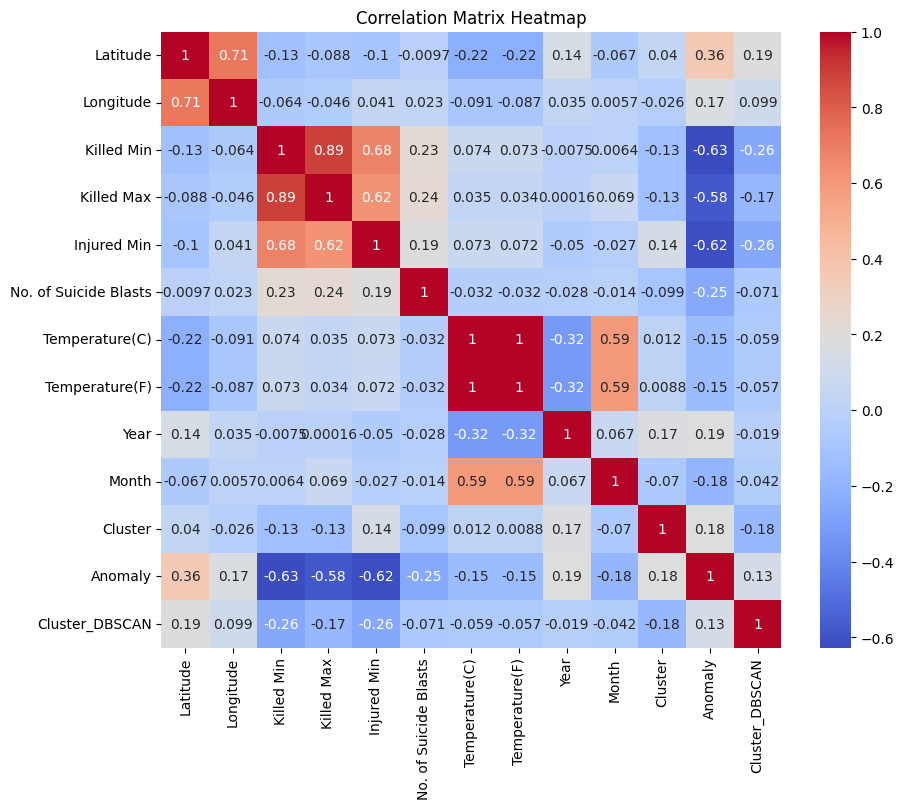

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


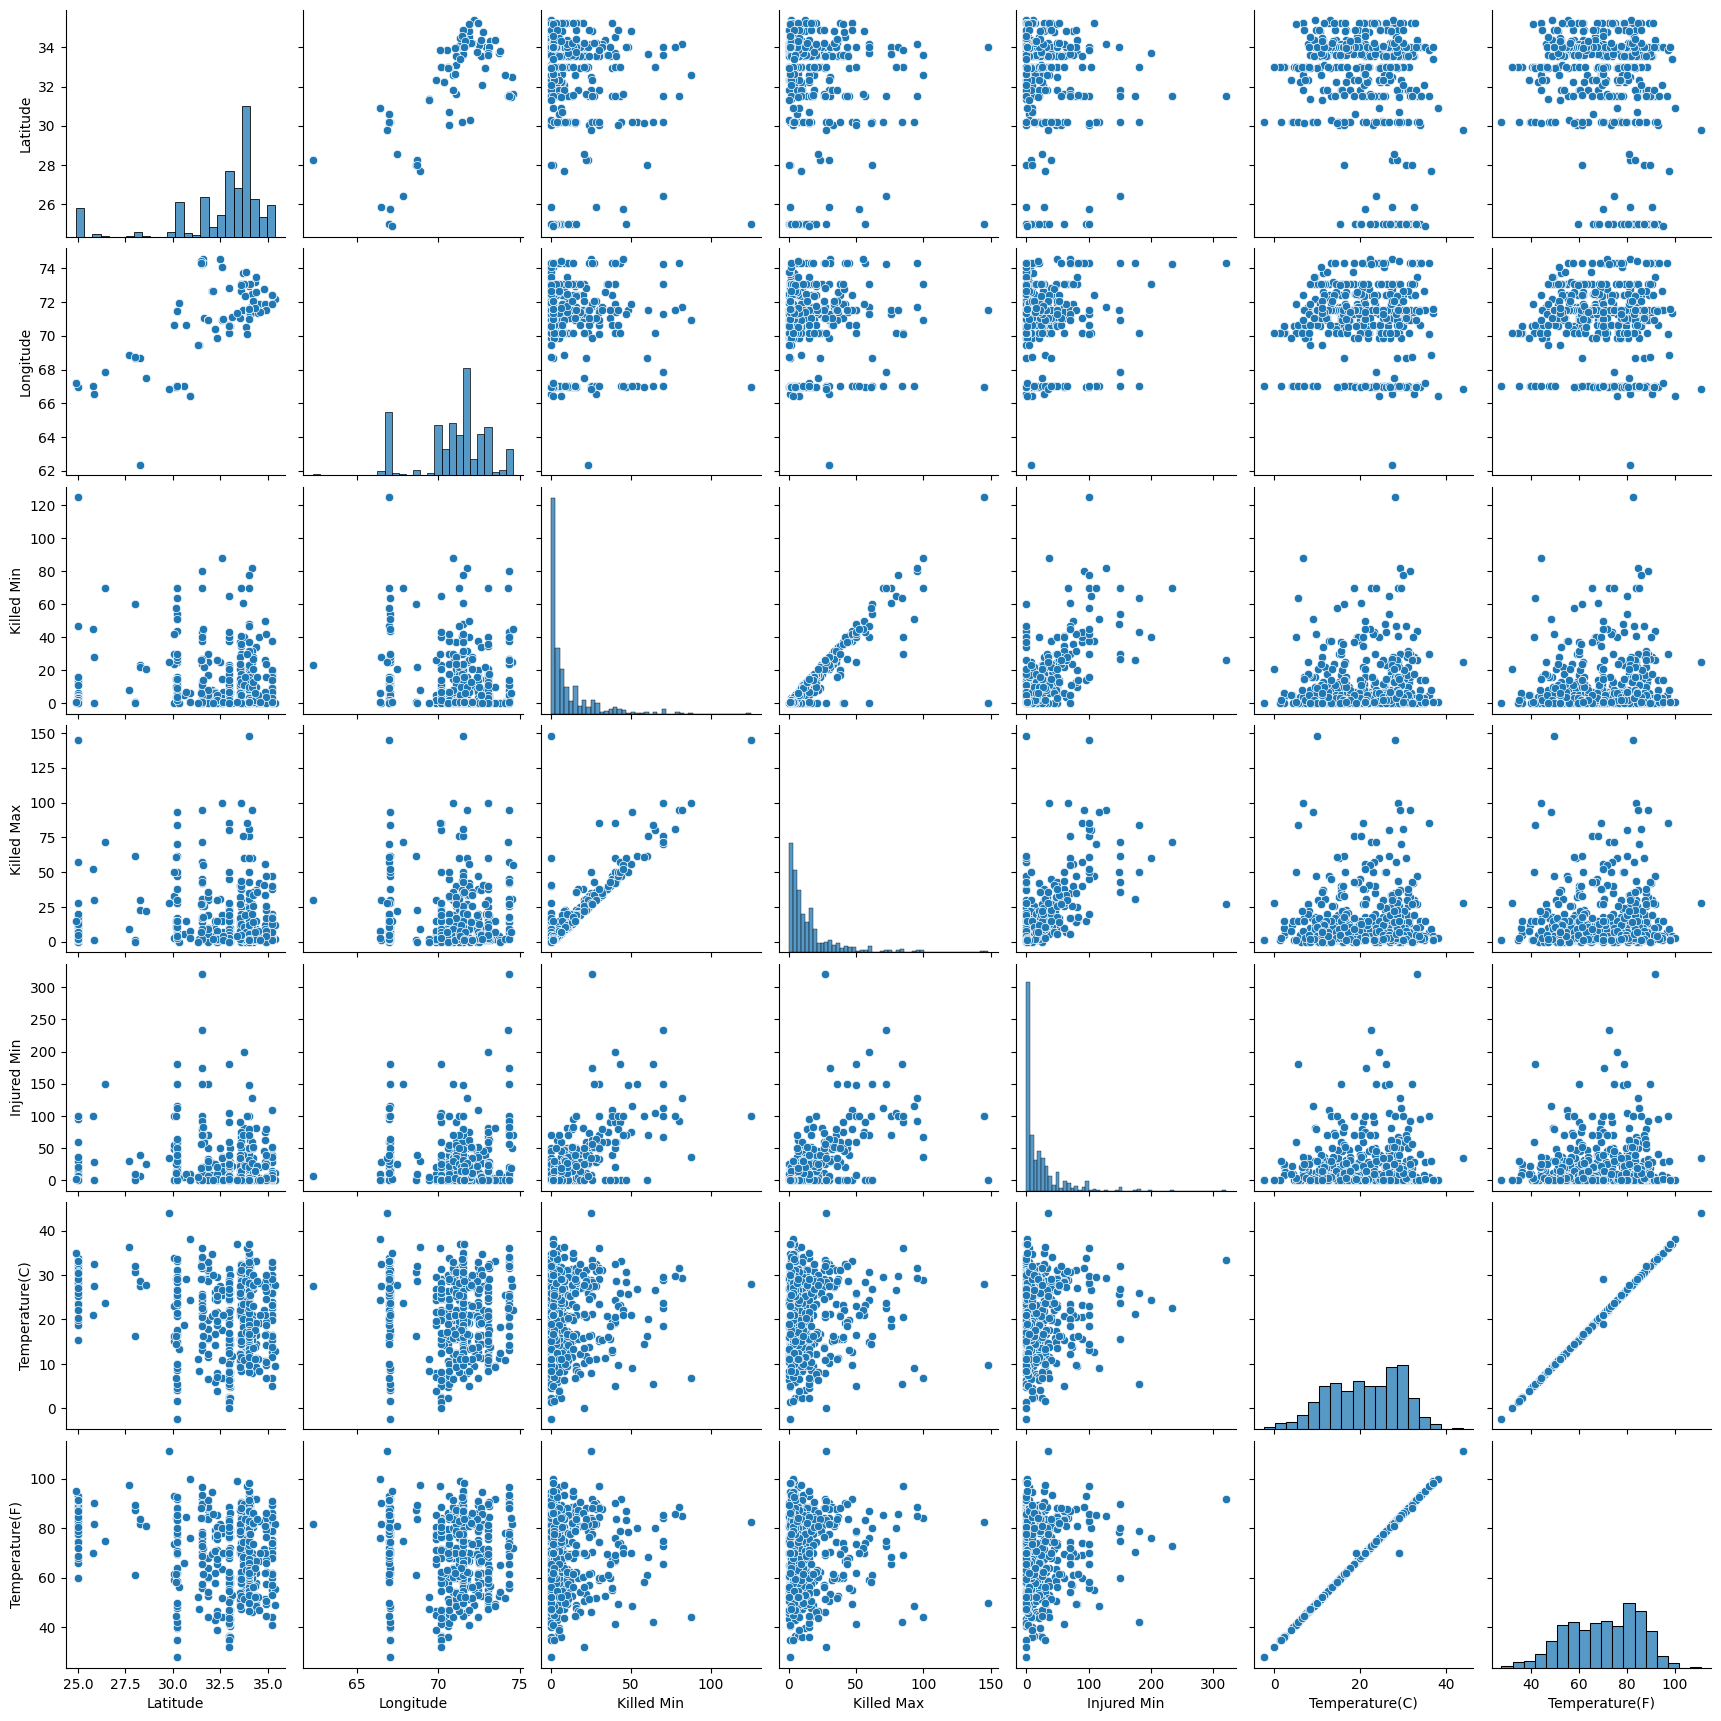

In [45]:
# Pair plot for numerical variables
sns.pairplot(df[['Latitude', 'Longitude', 'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max', 'Temperature(C)', 'Temperature(F)']])
plt.show()


In [46]:
# Save cleaned data to a new CSV file
df.to_csv('Cleaned_Suicide_bombing_attacks.csv', index=False)
